# 📈 Notebook 2 : Exploration et Visualisation des Données (EDA)
## Ames Housing Dataset - Analyse Exploratoire Approfondie

---

### 📋 Table des Matières
1. [Configuration et Chargement](#1-configuration-et-chargement)
2. [Statistiques Descriptives](#2-statistiques-descriptives)
3. [Analyse de la Variable Cible (SalePrice)](#3-analyse-de-la-variable-cible)
4. [Analyse Univariée](#4-analyse-univariée)
5. [Analyse Bivariée avec SalePrice](#5-analyse-bivariée)
6. [Analyse Multivariée](#6-analyse-multivariée)
7. [Feature Importance Préliminaire](#7-feature-importance)
8. [Analyse Temporelle](#8-analyse-temporelle)
9. [Conclusions et Insights](#9-conclusions)

---

### 🎯 Objectif
Comprendre en profondeur les patterns, distributions et relations entre les variables pour guider la modélisation.

**Auteur** : Projet ML Ames Housing  
**Date** : 2025

---
## 1. Configuration et Chargement

In [1]:
# =============================================================================
# IMPORTS ET CONFIGURATION
# =============================================================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.ensemble import RandomForestRegressor
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import pickle
import warnings

warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', 50)
pd.set_option('display.float_format', '{:.2f}'.format)

# Style
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette('husl')
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 11

print("✅ Bibliothèques chargées!")

✅ Bibliothèques chargées!


In [2]:
# Charger les données originales ET prétraitées
df_original = pd.read_csv('../data/train.csv')
df = pd.read_csv('../data/data_preprocessed.csv')

print(f"📊 Données originales: {df_original.shape}")
print(f"📊 Données prétraitées: {df.shape}")

📊 Données originales: (1460, 81)
📊 Données prétraitées: (1458, 166)


---
## 2. Statistiques Descriptives

In [3]:
# =============================================================================
# STATISTIQUES DESCRIPTIVES - VARIABLES NUMÉRIQUES
# =============================================================================

print("="*70)
print("📊 STATISTIQUES DESCRIPTIVES - DONNÉES ORIGINALES")
print("="*70)

# Variables numériques clés
key_numeric = ['SalePrice', 'GrLivArea', 'TotalBsmtSF', 'LotArea', 'GarageArea', 
               'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd']

# Statistiques étendues
stats_df = df_original[key_numeric].describe().T
stats_df['skewness'] = df_original[key_numeric].skew()
stats_df['kurtosis'] = df_original[key_numeric].kurtosis()

print("\n📋 Statistiques des variables numériques clés:")
stats_df

📊 STATISTIQUES DESCRIPTIVES - DONNÉES ORIGINALES

📋 Statistiques des variables numériques clés:


,count,mean,std,min,25%,50%,75%,max,skewness,kurtosis
SalePrice,1460.00,180921.20,79442.50,34900.00,129975.00,163000.00,214000.00,755000.00,1.88,6.54
GrLivArea,1460.00,1515.46,525.48,334.00,1129.50,1464.00,1776.75,5642.00,1.37,4.90
TotalBsmtSF,1460.00,1057.43,438.71,0.00,795.75,991.50,1298.25,6110.00,1.52,13.25
LotArea,1460.00,10516.83,9981.26,1300.00,7553.50,9478.50,11601.50,215245.00,12.21,203.24
GarageArea,1460.00,472.98,213.80,0.00,334.50,480.00,576.00,1418.00,0.18,0.92
OverallQual,1460.00,6.10,1.38,1.00,5.00,6.00,7.00,10.00,0.22,0.10
OverallCond,1460.00,5.58,1.11,1.00,5.00,5.00,6.00,9.00,0.69,1.11
YearBuilt,1460.00,1971.27,30.20,1872.00,1954.00,1973.00,2000.00,2010.00,-0.61,-0.44
YearRemodAdd,1460.00,1984.87,20.65,1950.00,1967.00,1994.00,2004.00,2010.00,-0.50,-1.27


In [4]:
# =============================================================================
# STATISTIQUES DESCRIPTIVES - VARIABLES CATÉGORIELLES
# =============================================================================

cat_cols = df_original.select_dtypes(include=['object']).columns

cat_summary = []
for col in cat_cols:
    cat_summary.append({
        'Variable': col,
        'Unique': df_original[col].nunique(),
        'Mode': df_original[col].mode()[0],
        'Mode_Freq': (df_original[col] == df_original[col].mode()[0]).sum(),
        'Missing': df_original[col].isnull().sum()
    })

cat_df = pd.DataFrame(cat_summary).sort_values('Unique', ascending=False)
print("\n📋 Résumé des variables catégorielles:")
cat_df.head(15)


📋 Résumé des variables catégorielles:


,Variable,Unique,Mode,Mode_Freq,Missing
8,Neighborhood,25,NAmes,225,0
16,Exterior2nd,16,VinylSd,504,0
15,Exterior1st,15,VinylSd,515,0
41,SaleType,9,WD,1267,0
9,Condition1,9,Norm,1260,0
10,Condition2,8,Norm,1445,0
12,HouseStyle,8,1Story,726,0
14,RoofMatl,8,CompShg,1434,0
31,Functional,7,Typ,1360,0
25,BsmtFinType2,6,Unf,1256,38


---
## 3. Analyse de la Variable Cible (SalePrice)

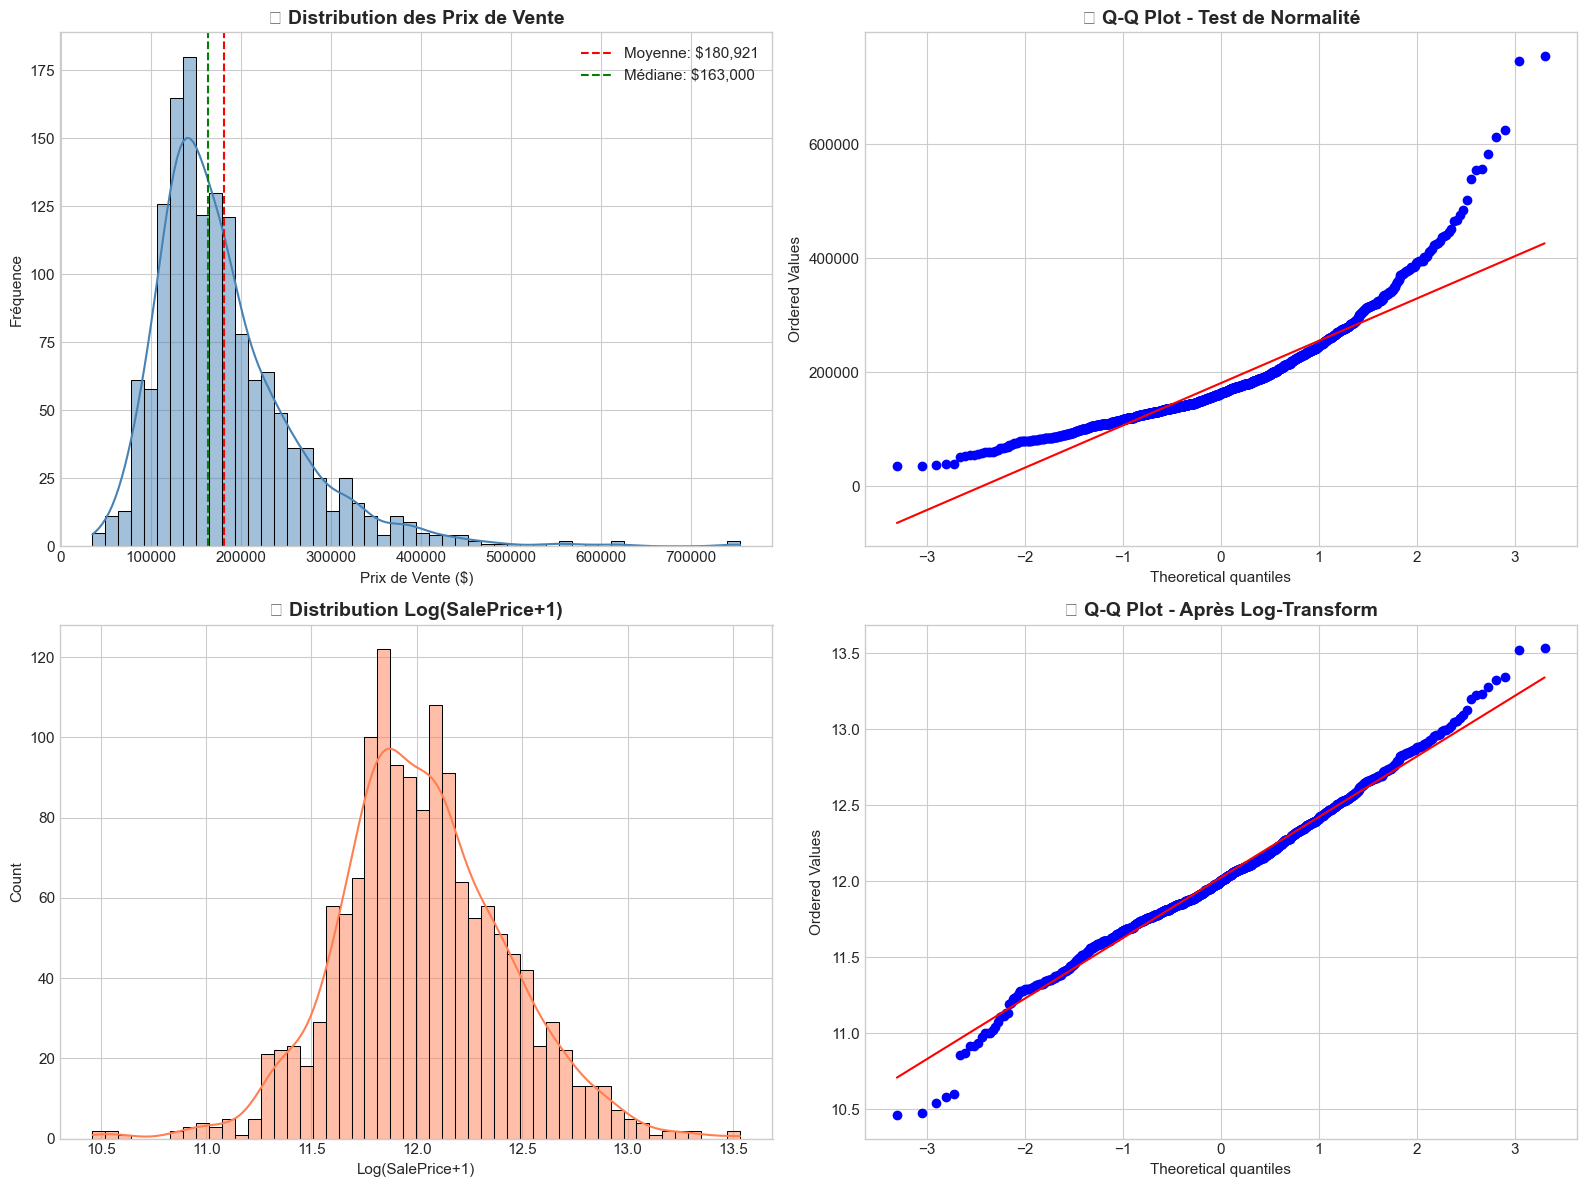


📊 Skewness original: 1.883
📊 Skewness après log: 0.121
📊 Shapiro-Wilk p-value (log): 0.0003


In [5]:
# =============================================================================
# DISTRIBUTION DE SALEPRICE
# =============================================================================

fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# 1. Histogramme + KDE
ax1 = axes[0, 0]
sns.histplot(df_original['SalePrice'], kde=True, ax=ax1, color='steelblue', bins=50)
ax1.axvline(df_original['SalePrice'].mean(), color='red', linestyle='--', label=f"Moyenne: ${df_original['SalePrice'].mean():,.0f}")
ax1.axvline(df_original['SalePrice'].median(), color='green', linestyle='--', label=f"Médiane: ${df_original['SalePrice'].median():,.0f}")
ax1.set_title('📊 Distribution des Prix de Vente', fontsize=14, fontweight='bold')
ax1.set_xlabel('Prix de Vente ($)')
ax1.set_ylabel('Fréquence')
ax1.legend()

# 2. Q-Q Plot
ax2 = axes[0, 1]
stats.probplot(df_original['SalePrice'], dist="norm", plot=ax2)
ax2.set_title('📊 Q-Q Plot - Test de Normalité', fontsize=14, fontweight='bold')

# 3. Distribution Log-transformée
ax3 = axes[1, 0]
log_price = np.log1p(df_original['SalePrice'])
sns.histplot(log_price, kde=True, ax=ax3, color='coral', bins=50)
ax3.set_title('📊 Distribution Log(SalePrice+1)', fontsize=14, fontweight='bold')
ax3.set_xlabel('Log(SalePrice+1)')

# 4. Q-Q Plot après transformation
ax4 = axes[1, 1]
stats.probplot(log_price, dist="norm", plot=ax4)
ax4.set_title('📊 Q-Q Plot - Après Log-Transform', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

# Statistiques
print(f"\n📊 Skewness original: {df_original['SalePrice'].skew():.3f}")
print(f"📊 Skewness après log: {log_price.skew():.3f}")
print(f"📊 Shapiro-Wilk p-value (log): {stats.shapiro(log_price.sample(500))[1]:.4f}")

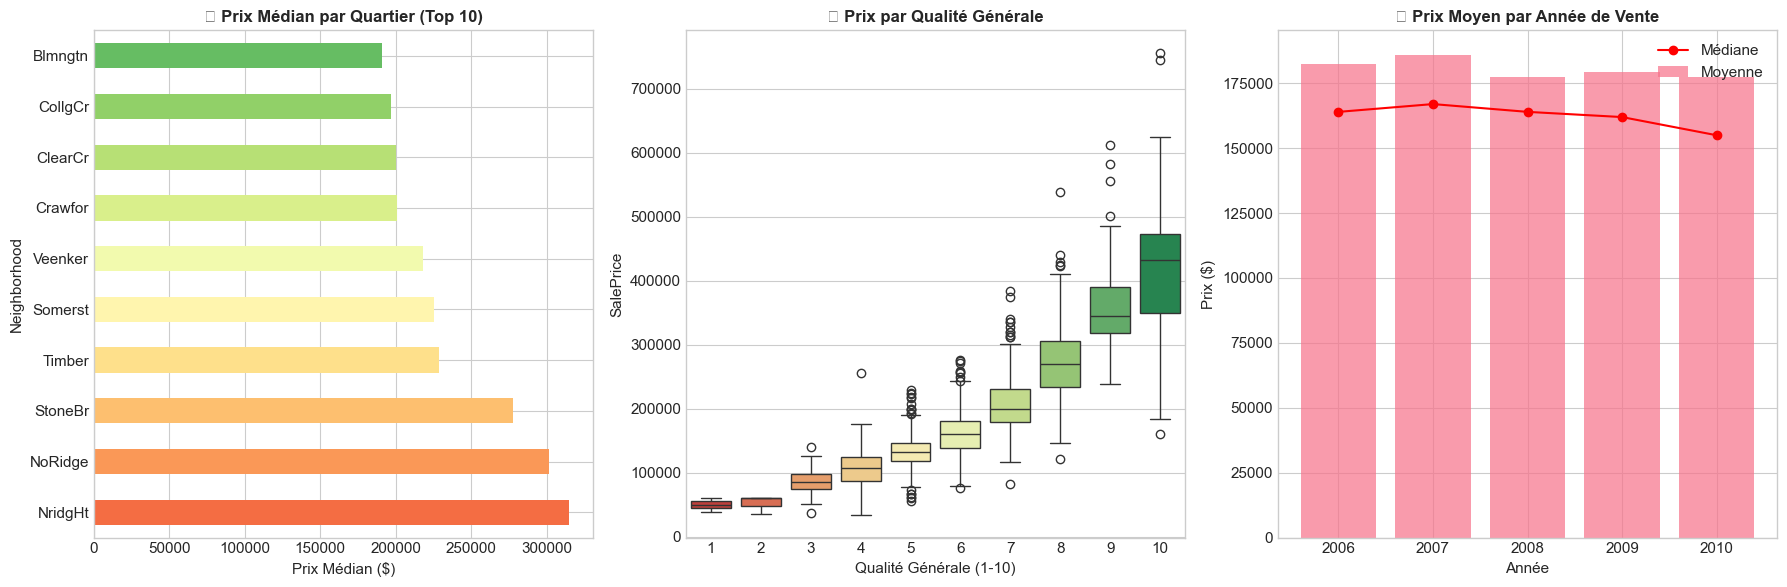

In [6]:
# =============================================================================
# PRIX PAR SEGMENTS
# =============================================================================

fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# 1. Prix par Neighborhood (Top 10)
ax1 = axes[0]
neighborhood_price = df_original.groupby('Neighborhood')['SalePrice'].median().sort_values(ascending=False).head(10)
colors = plt.cm.RdYlGn(np.linspace(0.2, 0.8, 10))
neighborhood_price.plot(kind='barh', ax=ax1, color=colors)
ax1.set_title('💰 Prix Médian par Quartier (Top 10)', fontsize=12, fontweight='bold')
ax1.set_xlabel('Prix Médian ($)')

# 2. Prix par OverallQual
ax2 = axes[1]
sns.boxplot(data=df_original, x='OverallQual', y='SalePrice', ax=ax2, palette='RdYlGn')
ax2.set_title('💰 Prix par Qualité Générale', fontsize=12, fontweight='bold')
ax2.set_xlabel('Qualité Générale (1-10)')

# 3. Prix par année de vente
ax3 = axes[2]
yearly_price = df_original.groupby('YrSold')['SalePrice'].agg(['mean', 'median', 'count'])
ax3.bar(yearly_price.index, yearly_price['mean'], alpha=0.7, label='Moyenne')
ax3.plot(yearly_price.index, yearly_price['median'], 'ro-', label='Médiane')
ax3.set_title('💰 Prix Moyen par Année de Vente', fontsize=12, fontweight='bold')
ax3.set_xlabel('Année')
ax3.set_ylabel('Prix ($)')
ax3.legend()

plt.tight_layout()
plt.show()

---
## 4. Analyse Univariée

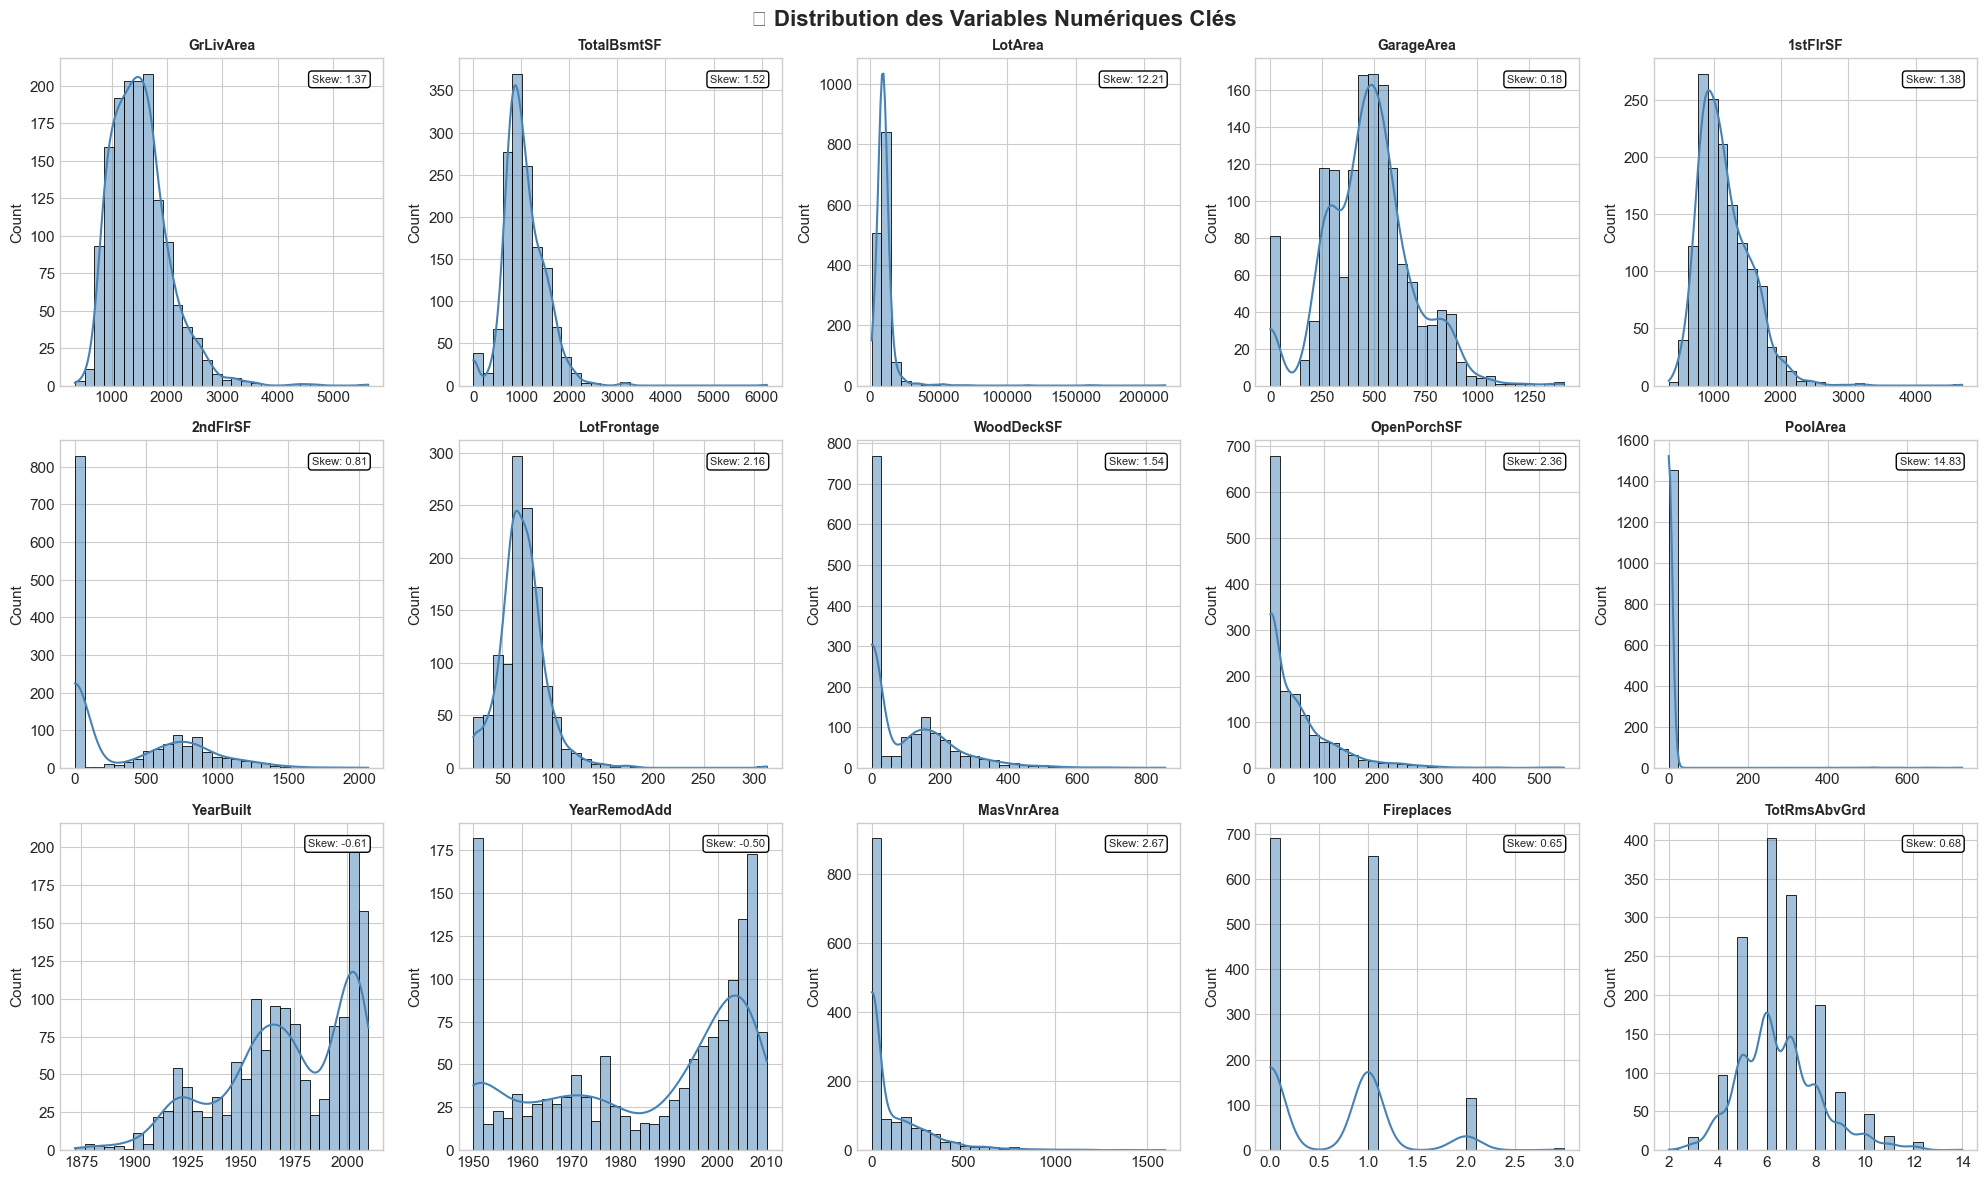

In [7]:
# =============================================================================
# HISTOGRAMMES DES TOP VARIABLES NUMÉRIQUES
# =============================================================================

fig, axes = plt.subplots(3, 5, figsize=(20, 12))
axes = axes.flatten()

top_numeric = ['GrLivArea', 'TotalBsmtSF', 'LotArea', 'GarageArea', '1stFlrSF',
               '2ndFlrSF', 'LotFrontage', 'WoodDeckSF', 'OpenPorchSF', 'PoolArea',
               'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'Fireplaces', 'TotRmsAbvGrd']

for idx, col in enumerate(top_numeric):
    if col in df_original.columns:
        ax = axes[idx]
        sns.histplot(df_original[col].dropna(), kde=True, ax=ax, color='steelblue', bins=30)
        ax.set_title(f'{col}', fontsize=10, fontweight='bold')
        ax.set_xlabel('')
        skew_val = df_original[col].skew()
        ax.text(0.95, 0.95, f'Skew: {skew_val:.2f}', transform=ax.transAxes, 
                ha='right', va='top', fontsize=8, bbox=dict(boxstyle='round', facecolor='white'))

plt.suptitle('📊 Distribution des Variables Numériques Clés', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

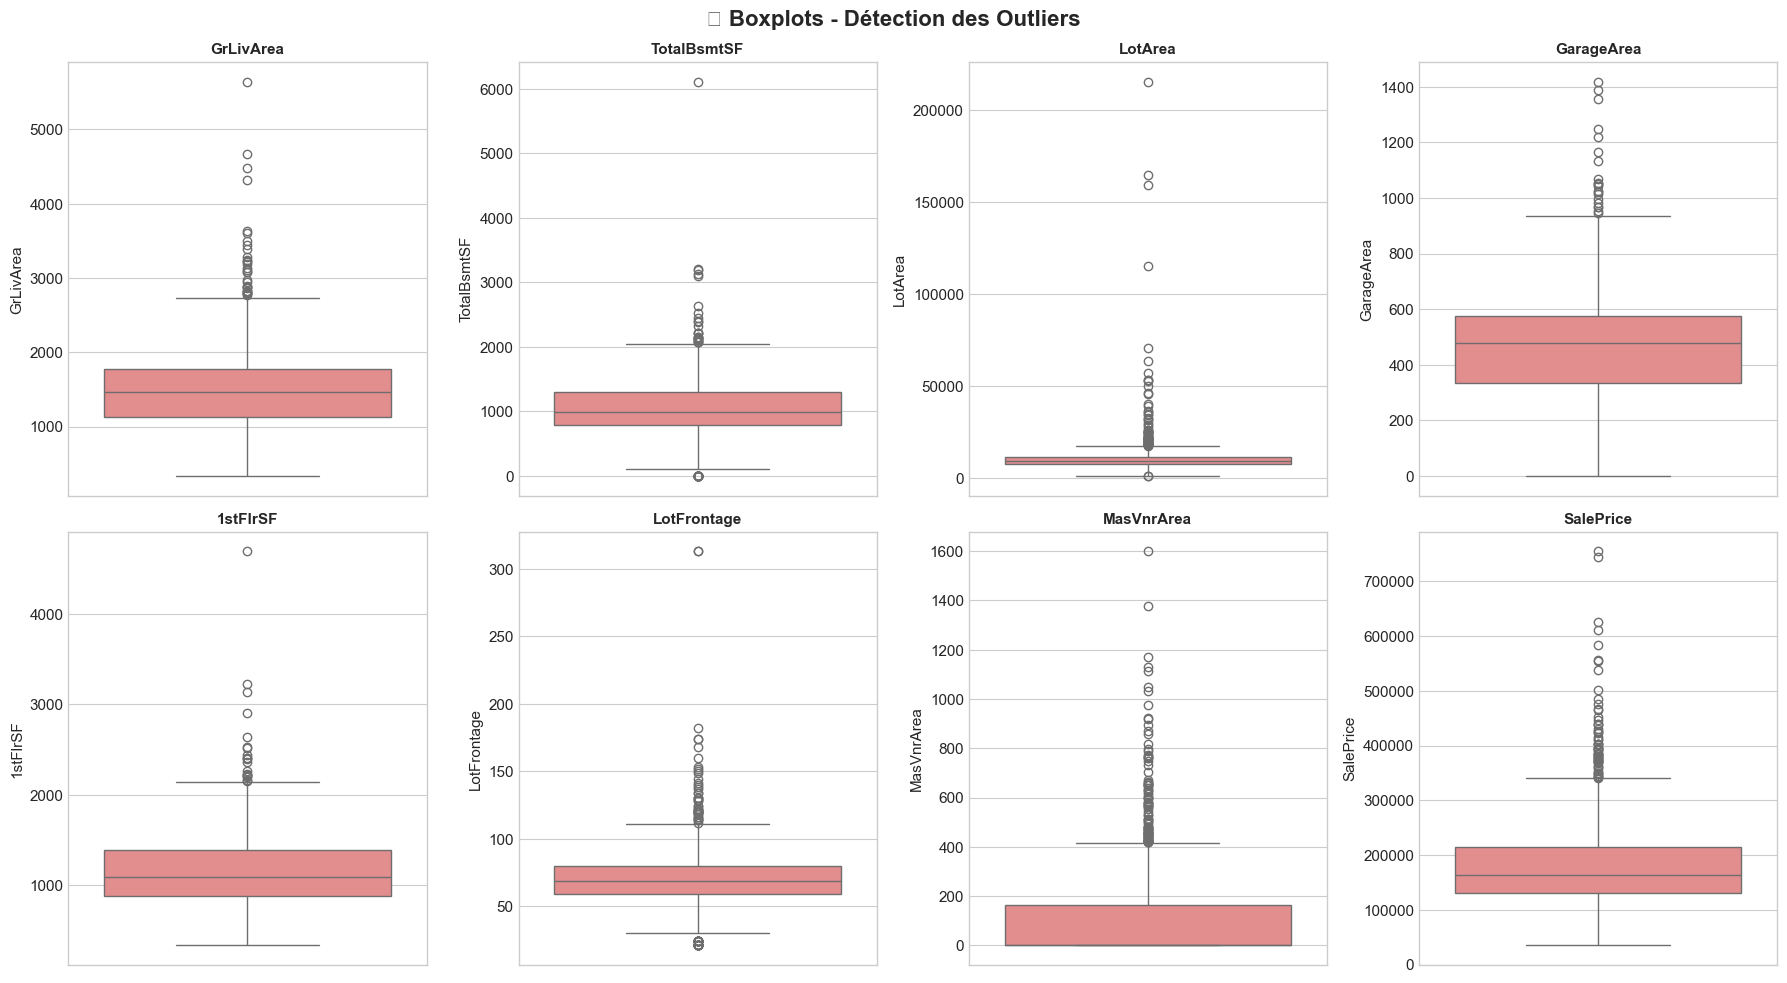

In [8]:
# =============================================================================
# BOXPLOTS DES VARIABLES NUMÉRIQUES
# =============================================================================

fig, axes = plt.subplots(2, 4, figsize=(18, 10))
axes = axes.flatten()

boxplot_cols = ['GrLivArea', 'TotalBsmtSF', 'LotArea', 'GarageArea',
                '1stFlrSF', 'LotFrontage', 'MasVnrArea', 'SalePrice']

for idx, col in enumerate(boxplot_cols):
    ax = axes[idx]
    if col in df_original.columns:
        sns.boxplot(y=df_original[col].dropna(), ax=ax, color='lightcoral')
        ax.set_title(f'{col}', fontsize=11, fontweight='bold')

plt.suptitle('📦 Boxplots - Détection des Outliers', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

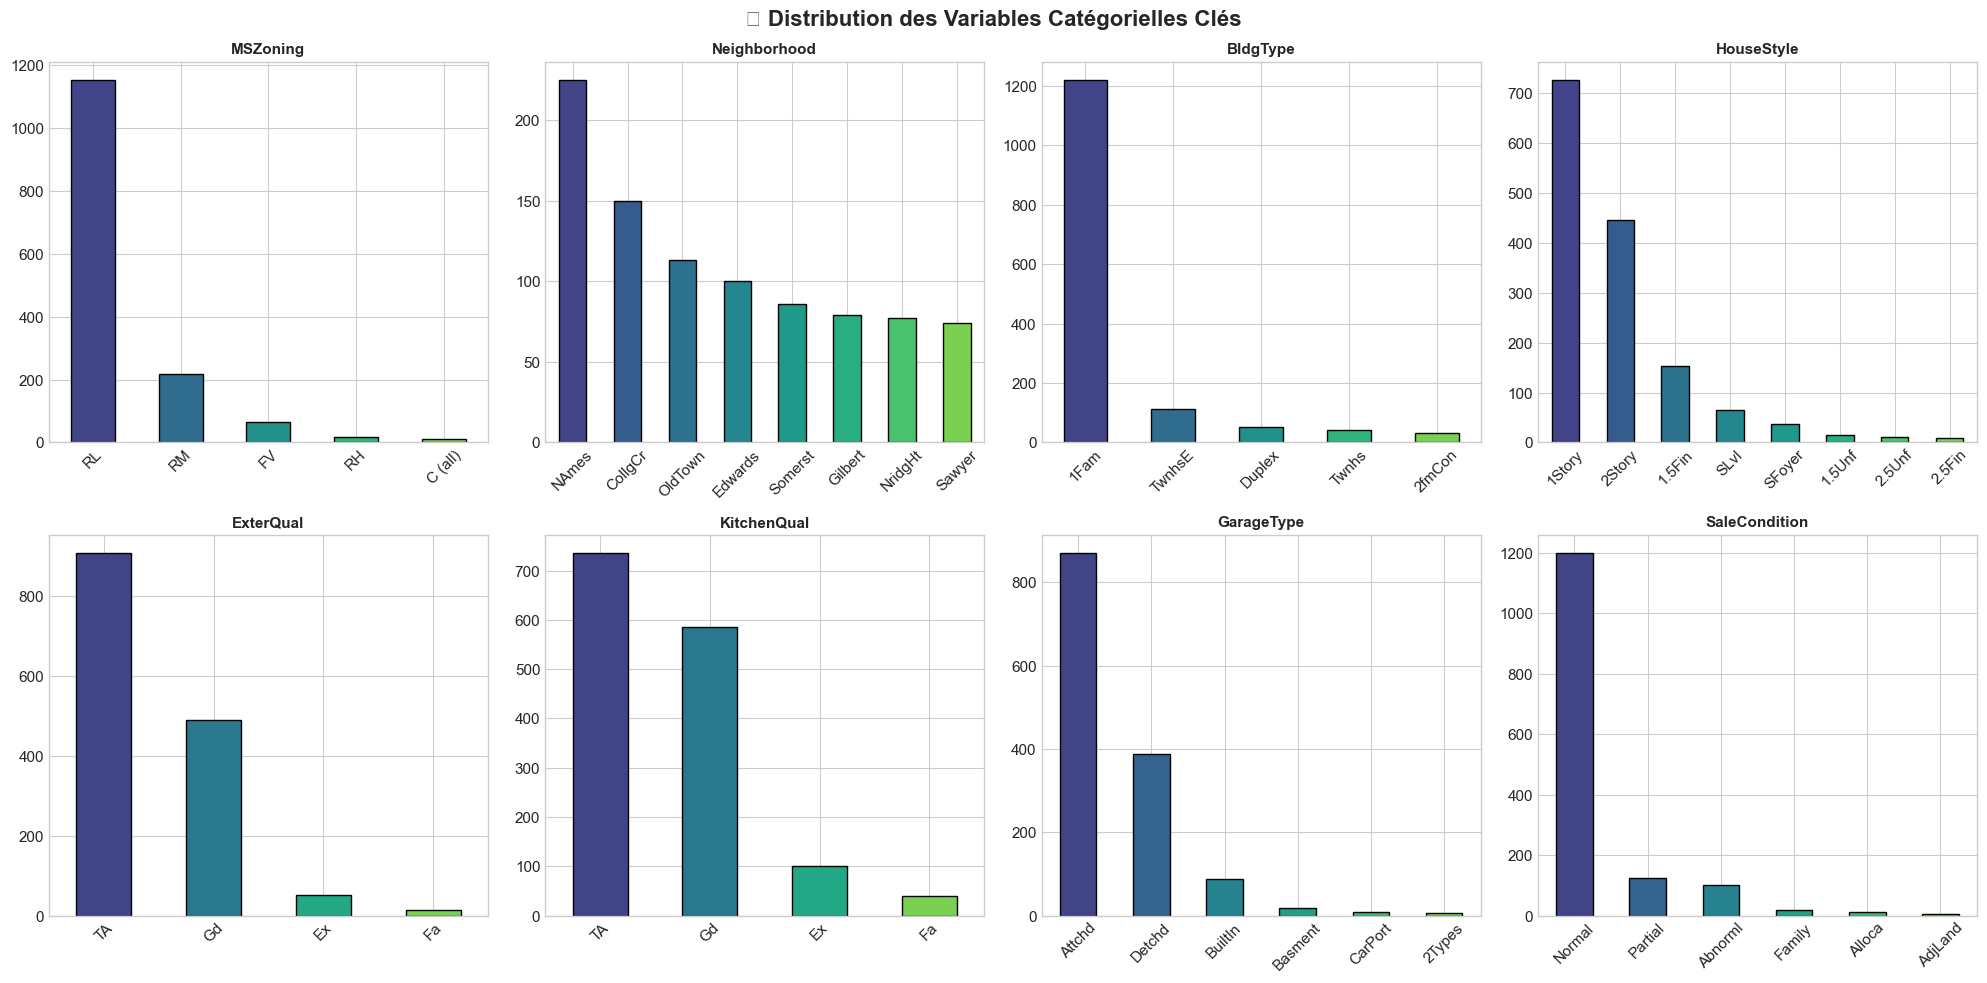

In [9]:
# =============================================================================
# BARPLOTS DES VARIABLES CATÉGORIELLES
# =============================================================================

fig, axes = plt.subplots(2, 4, figsize=(20, 10))
axes = axes.flatten()

cat_plot_cols = ['MSZoning', 'Neighborhood', 'BldgType', 'HouseStyle',
                 'ExterQual', 'KitchenQual', 'GarageType', 'SaleCondition']

for idx, col in enumerate(cat_plot_cols):
    ax = axes[idx]
    if col in df_original.columns:
        value_counts = df_original[col].value_counts().head(8)
        colors = plt.cm.viridis(np.linspace(0.2, 0.8, len(value_counts)))
        value_counts.plot(kind='bar', ax=ax, color=colors, edgecolor='black')
        ax.set_title(f'{col}', fontsize=11, fontweight='bold')
        ax.set_xlabel('')
        ax.tick_params(axis='x', rotation=45)

plt.suptitle('📊 Distribution des Variables Catégorielles Clés', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

---
## 5. Analyse Bivariée avec SalePrice

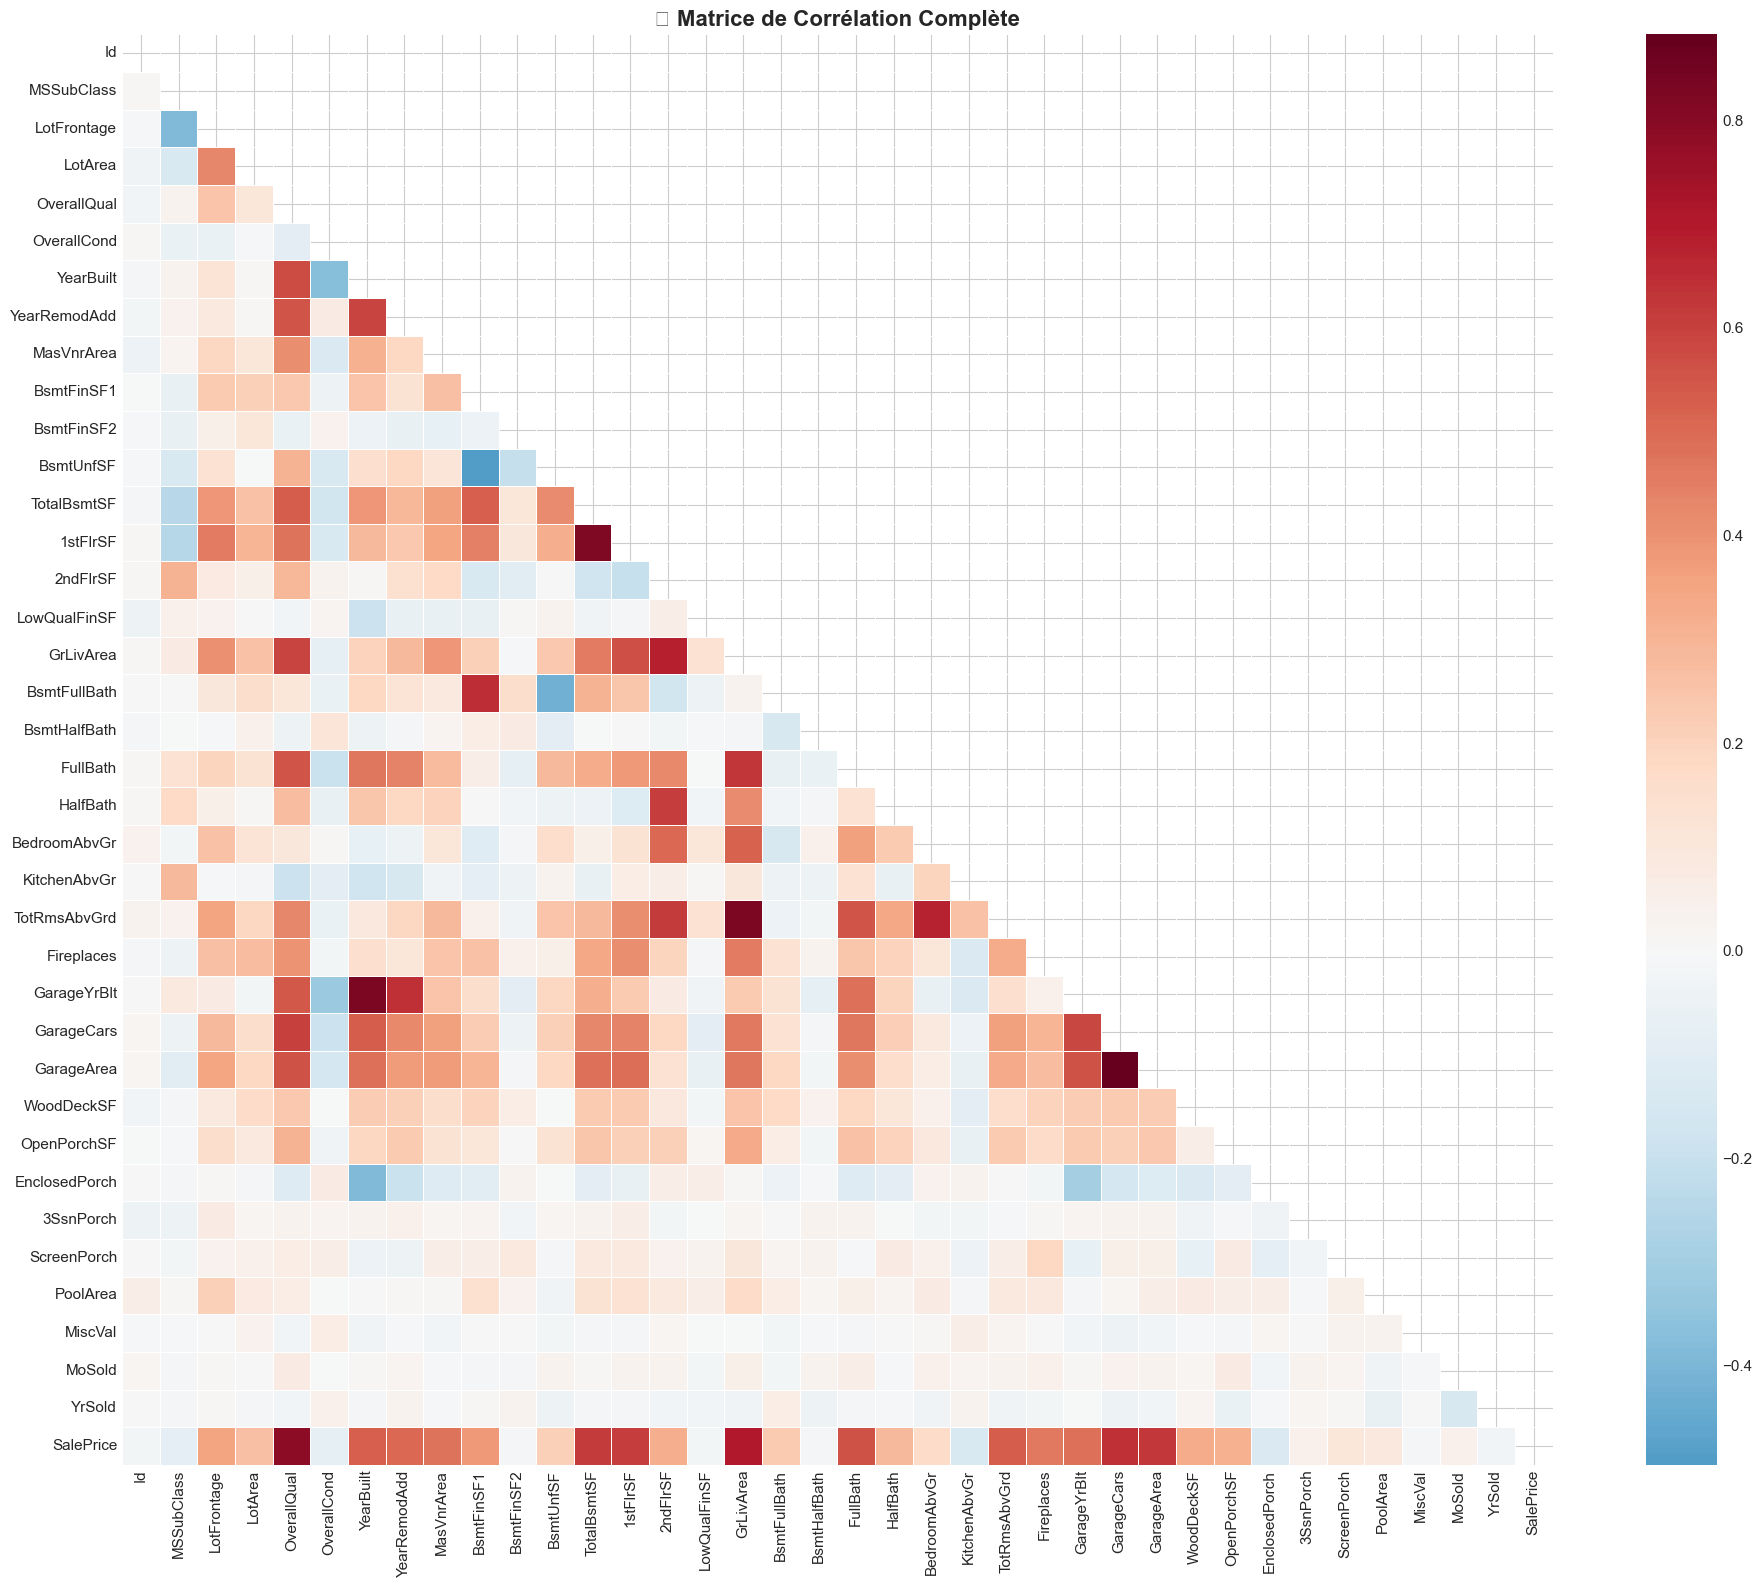

In [10]:
# =============================================================================
# MATRICE DE CORRÉLATION
# =============================================================================

# Sélectionner uniquement les colonnes numériques
numeric_cols = df_original.select_dtypes(include=[np.number]).columns
corr_matrix = df_original[numeric_cols].corr()

# Heatmap
fig, ax = plt.subplots(figsize=(20, 16))
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
sns.heatmap(corr_matrix, mask=mask, annot=False, cmap='RdBu_r', center=0,
            square=True, linewidths=0.5, ax=ax)
ax.set_title('🔥 Matrice de Corrélation Complète', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

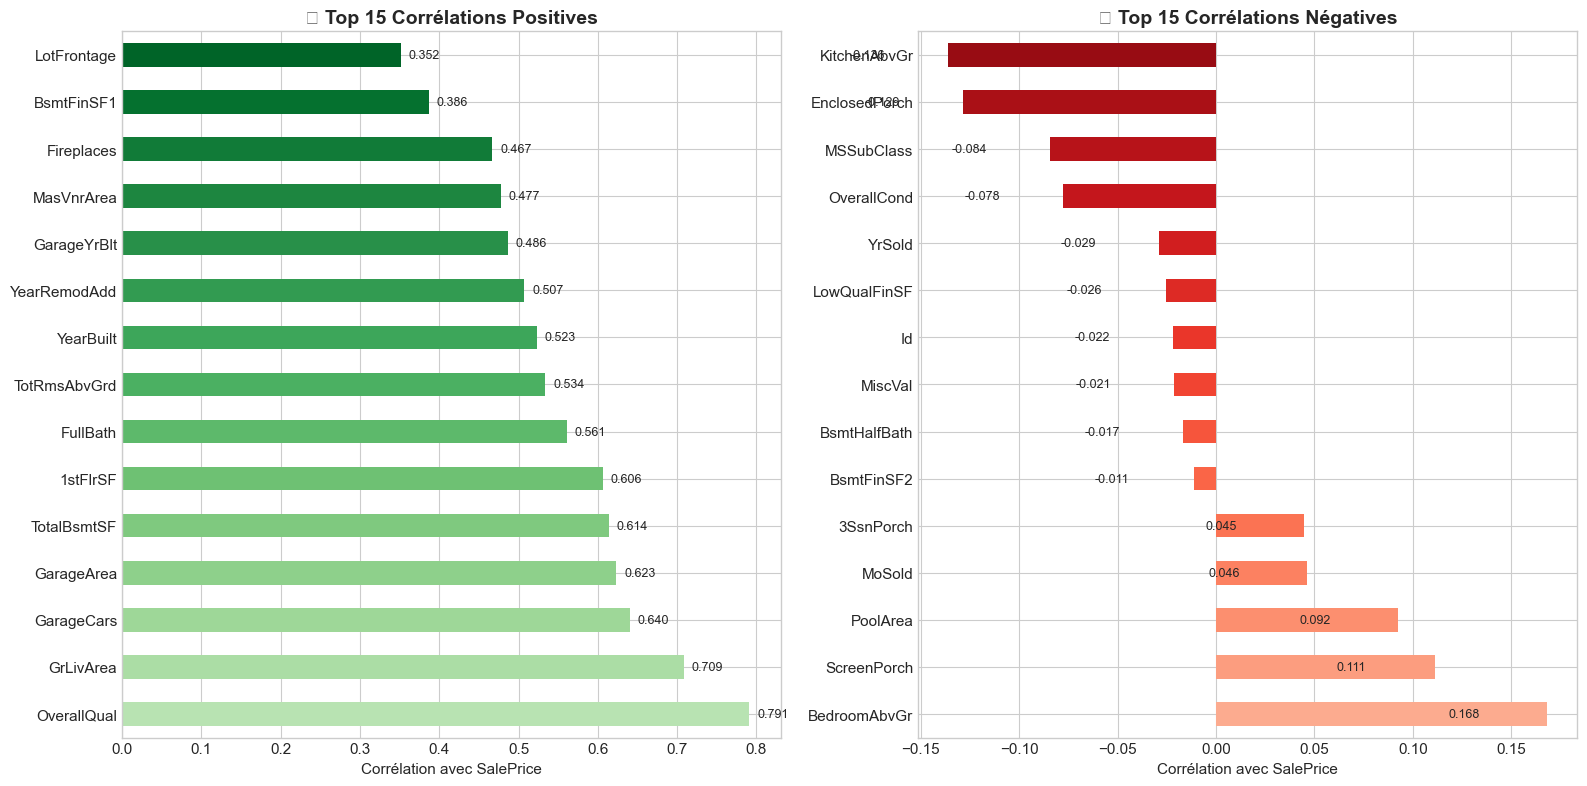


📊 Top 10 Features les plus corrélées avec SalePrice:
OverallQual    0.79
GrLivArea      0.71
GarageCars     0.64
GarageArea     0.62
TotalBsmtSF    0.61
1stFlrSF       0.61
FullBath       0.56
TotRmsAbvGrd   0.53
YearBuilt      0.52
YearRemodAdd   0.51
Name: SalePrice, dtype: float64


In [11]:
# =============================================================================
# TOP CORRÉLATIONS AVEC SALEPRICE
# =============================================================================

# Corrélations avec SalePrice
sale_price_corr = corr_matrix['SalePrice'].drop('SalePrice').sort_values(ascending=False)

fig, axes = plt.subplots(1, 2, figsize=(16, 8))

# Top 15 positives
ax1 = axes[0]
top_positive = sale_price_corr.head(15)
colors = plt.cm.Greens(np.linspace(0.3, 0.9, 15))
top_positive.plot(kind='barh', ax=ax1, color=colors)
ax1.set_title('✅ Top 15 Corrélations Positives', fontsize=14, fontweight='bold')
ax1.set_xlabel('Corrélation avec SalePrice')
for i, v in enumerate(top_positive):
    ax1.text(v + 0.01, i, f'{v:.3f}', va='center', fontsize=9)

# Top 15 négatives
ax2 = axes[1]
top_negative = sale_price_corr.tail(15)
colors = plt.cm.Reds(np.linspace(0.3, 0.9, 15))
top_negative.plot(kind='barh', ax=ax2, color=colors)
ax2.set_title('❌ Top 15 Corrélations Négatives', fontsize=14, fontweight='bold')
ax2.set_xlabel('Corrélation avec SalePrice')
for i, v in enumerate(top_negative):
    ax2.text(v - 0.05, i, f'{v:.3f}', va='center', fontsize=9)

plt.tight_layout()
plt.show()

print("\n📊 Top 10 Features les plus corrélées avec SalePrice:")
print(sale_price_corr.head(10))

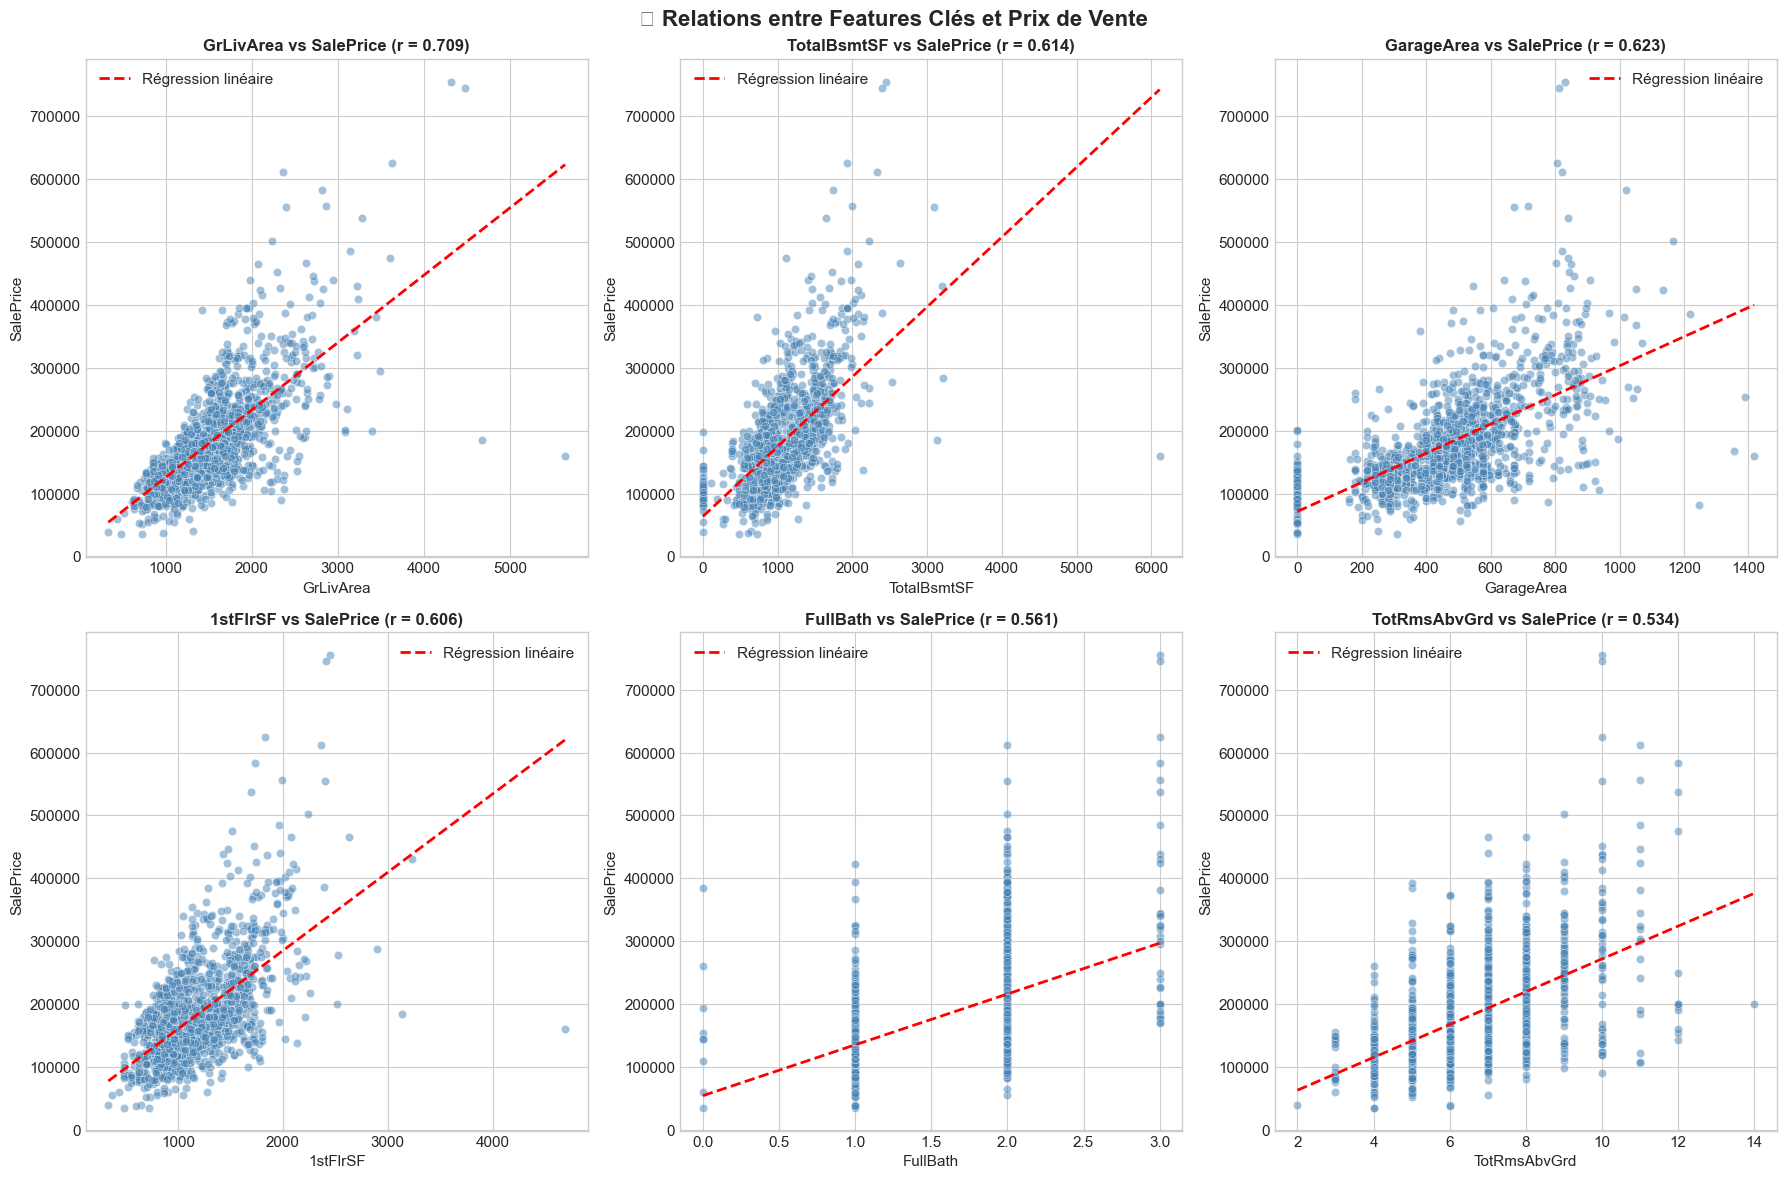

In [12]:
# =============================================================================
# SCATTER PLOTS : SALEPRICE VS TOP FEATURES
# =============================================================================

fig, axes = plt.subplots(2, 3, figsize=(18, 12))
axes = axes.flatten()

top_features = ['GrLivArea', 'TotalBsmtSF', 'GarageArea', '1stFlrSF', 'FullBath', 'TotRmsAbvGrd']

for idx, col in enumerate(top_features):
    ax = axes[idx]
    ax.scatter(df_original[col], df_original['SalePrice'], 
               alpha=0.5, c='steelblue', edgecolor='white', linewidth=0.5)
    
    # Ligne de régression
    z = np.polyfit(df_original[col].dropna(), df_original.loc[df_original[col].notna(), 'SalePrice'], 1)
    p = np.poly1d(z)
    x_line = np.linspace(df_original[col].min(), df_original[col].max(), 100)
    ax.plot(x_line, p(x_line), 'r--', linewidth=2, label='Régression linéaire')
    
    # Corrélation
    corr = df_original[col].corr(df_original['SalePrice'])
    ax.set_title(f'{col} vs SalePrice (r = {corr:.3f})', fontsize=12, fontweight='bold')
    ax.set_xlabel(col)
    ax.set_ylabel('SalePrice')
    ax.legend()

plt.suptitle('📈 Relations entre Features Clés et Prix de Vente', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

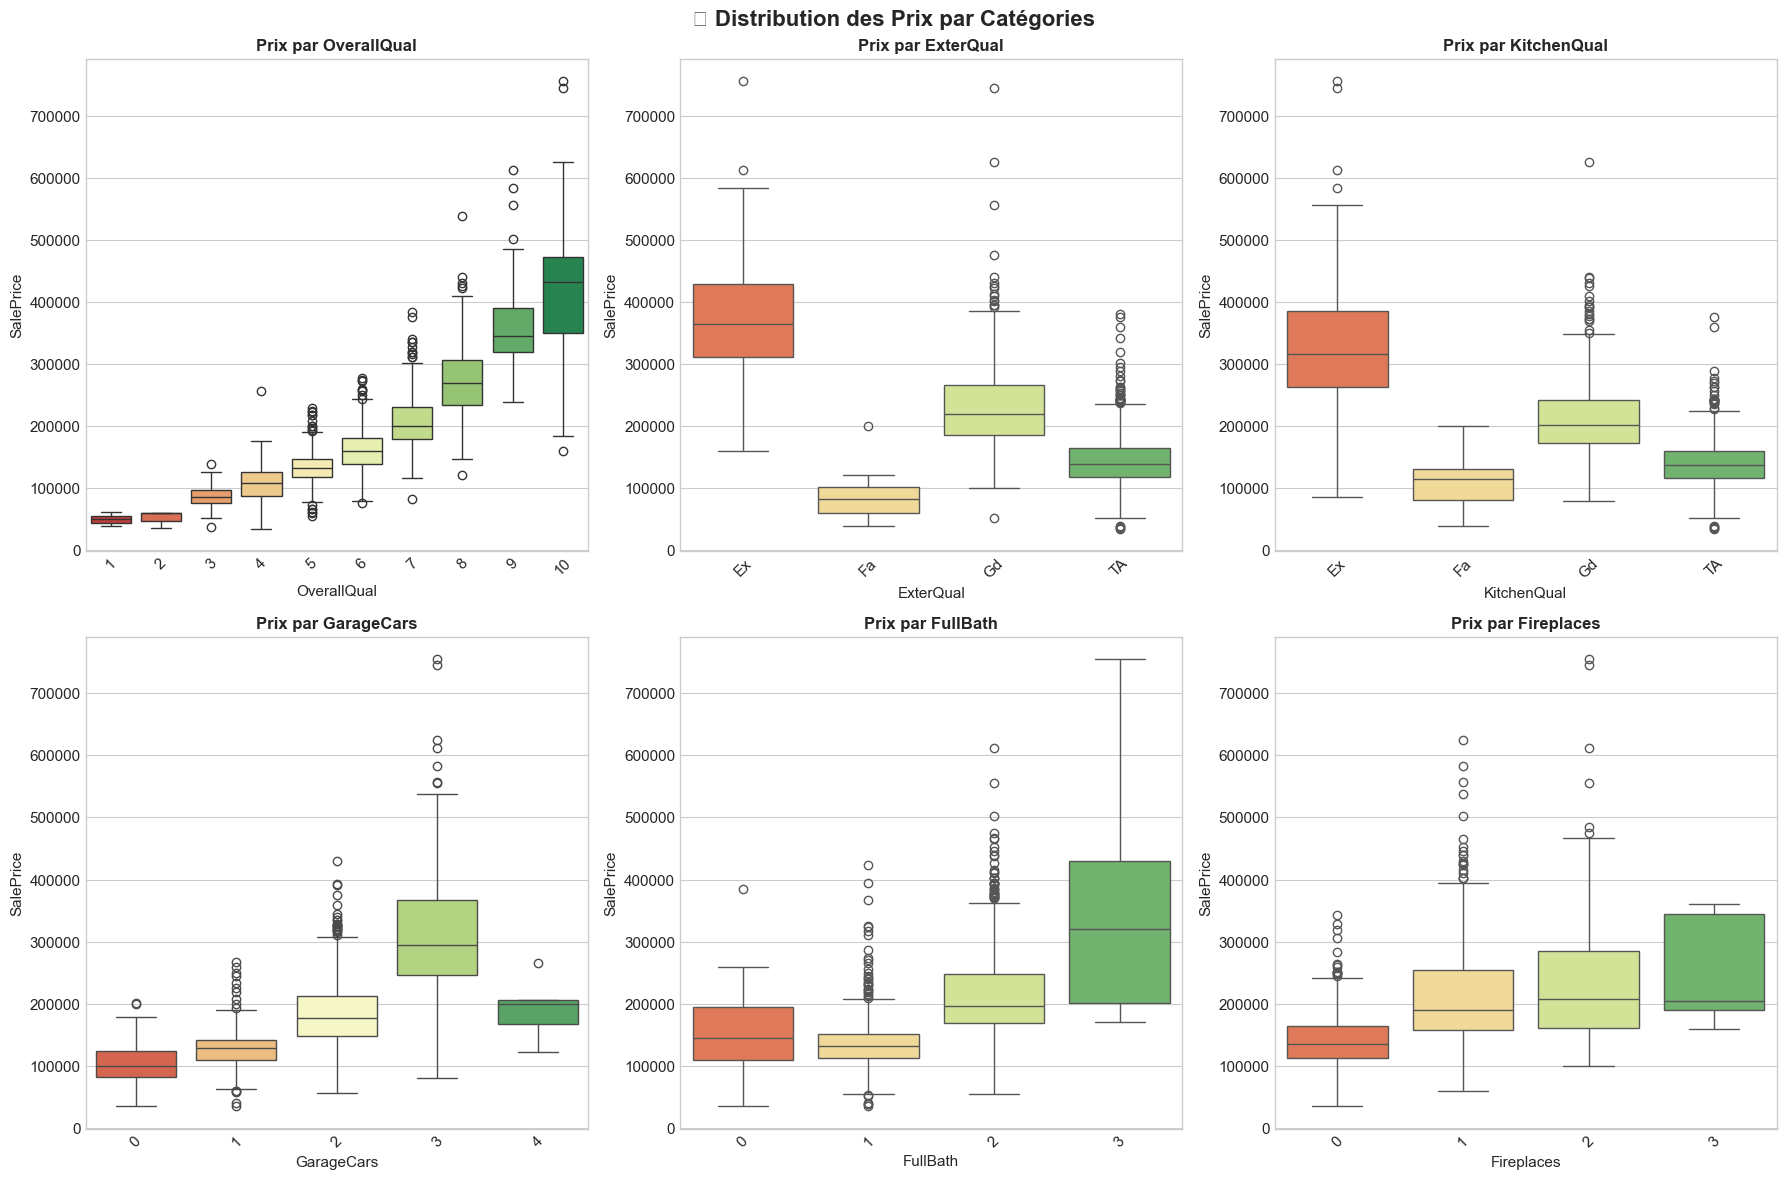

In [13]:
# =============================================================================
# BOXPLOTS : SALEPRICE PAR CATÉGORIES
# =============================================================================

fig, axes = plt.subplots(2, 3, figsize=(18, 12))
axes = axes.flatten()

cat_features = ['OverallQual', 'ExterQual', 'KitchenQual', 'GarageCars', 'FullBath', 'Fireplaces']

for idx, col in enumerate(cat_features):
    ax = axes[idx]
    order = sorted(df_original[col].dropna().unique())
    sns.boxplot(data=df_original, x=col, y='SalePrice', ax=ax, order=order, palette='RdYlGn')
    ax.set_title(f'Prix par {col}', fontsize=12, fontweight='bold')
    ax.tick_params(axis='x', rotation=45)

plt.suptitle('📦 Distribution des Prix par Catégories', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

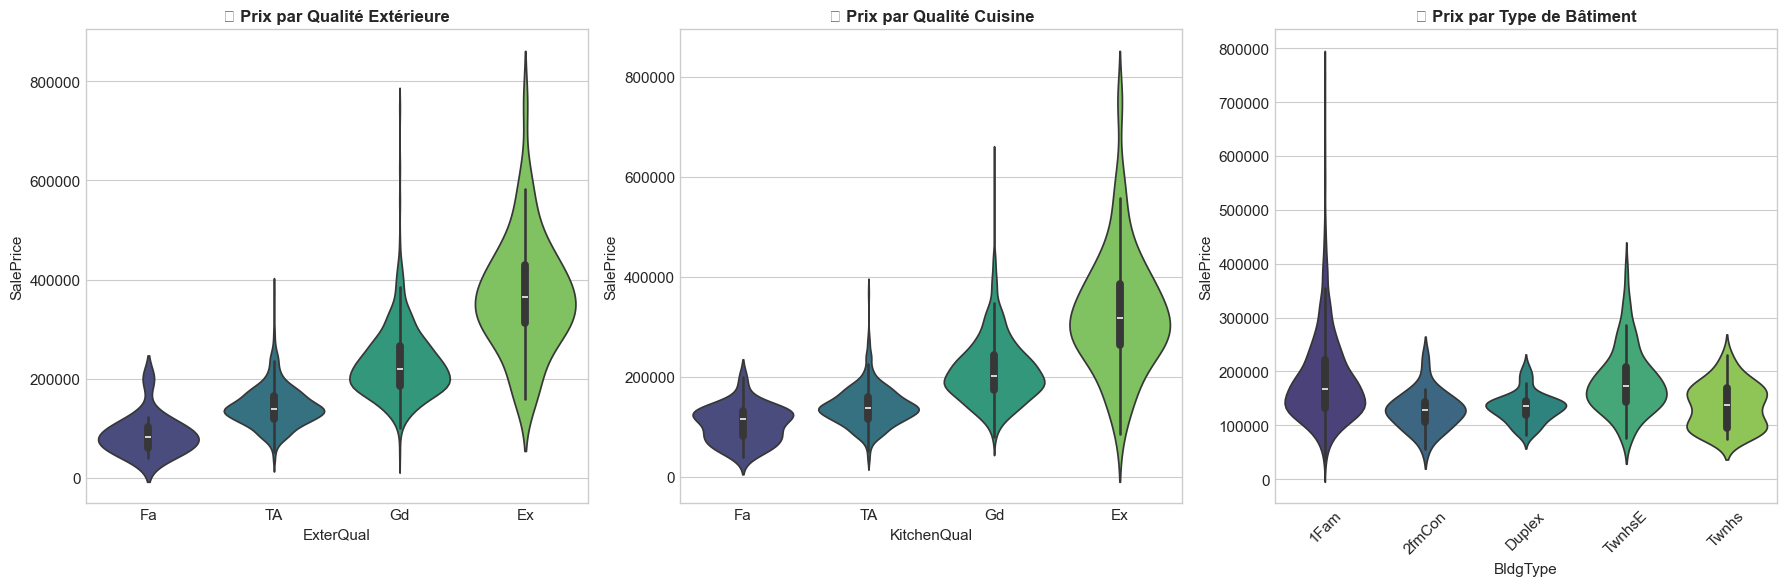

In [14]:
# =============================================================================
# VIOLIN PLOTS
# =============================================================================

fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# 1. Violin par ExterQual
ax1 = axes[0]
order = ['Po', 'Fa', 'TA', 'Gd', 'Ex']
order_present = [x for x in order if x in df_original['ExterQual'].values]
sns.violinplot(data=df_original, x='ExterQual', y='SalePrice', order=order_present, ax=ax1, palette='viridis')
ax1.set_title('🎻 Prix par Qualité Extérieure', fontsize=12, fontweight='bold')

# 2. Violin par KitchenQual
ax2 = axes[1]
order_present = [x for x in order if x in df_original['KitchenQual'].values]
sns.violinplot(data=df_original, x='KitchenQual', y='SalePrice', order=order_present, ax=ax2, palette='viridis')
ax2.set_title('🎻 Prix par Qualité Cuisine', fontsize=12, fontweight='bold')

# 3. Violin par BldgType
ax3 = axes[2]
sns.violinplot(data=df_original, x='BldgType', y='SalePrice', ax=ax3, palette='viridis')
ax3.set_title('🎻 Prix par Type de Bâtiment', fontsize=12, fontweight='bold')
ax3.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

---
## 6. Analyse Multivariée

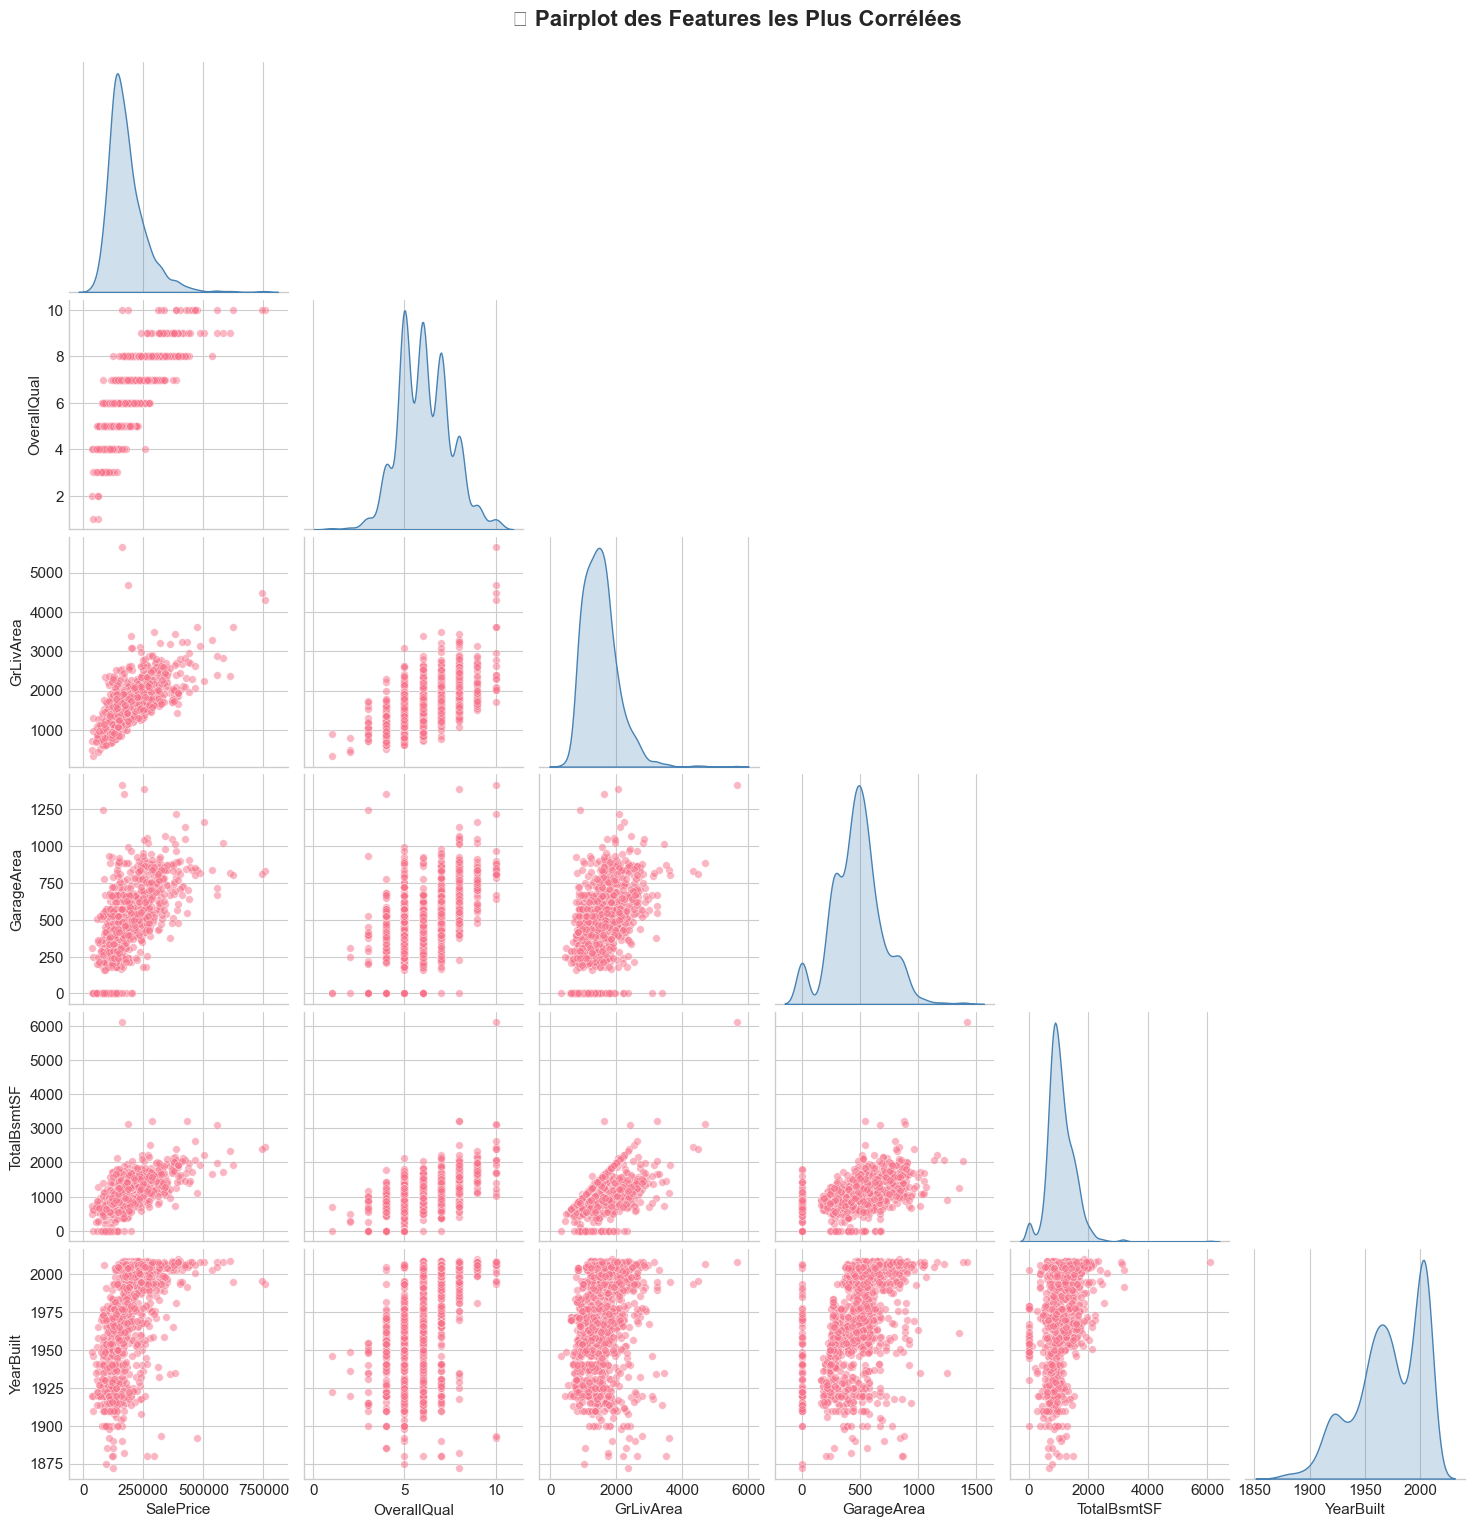

In [15]:
# =============================================================================
# PAIRPLOT DES TOP FEATURES
# =============================================================================

top_features_pair = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageArea', 'TotalBsmtSF', 'YearBuilt']
pair_data = df_original[top_features_pair].dropna()

g = sns.pairplot(pair_data, diag_kind='kde', corner=True,
                 plot_kws={'alpha': 0.5, 's': 30, 'edgecolor': 'white'},
                 diag_kws={'color': 'steelblue'})
g.fig.suptitle('📈 Pairplot des Features les Plus Corrélées', y=1.02, fontsize=16, fontweight='bold')
plt.show()

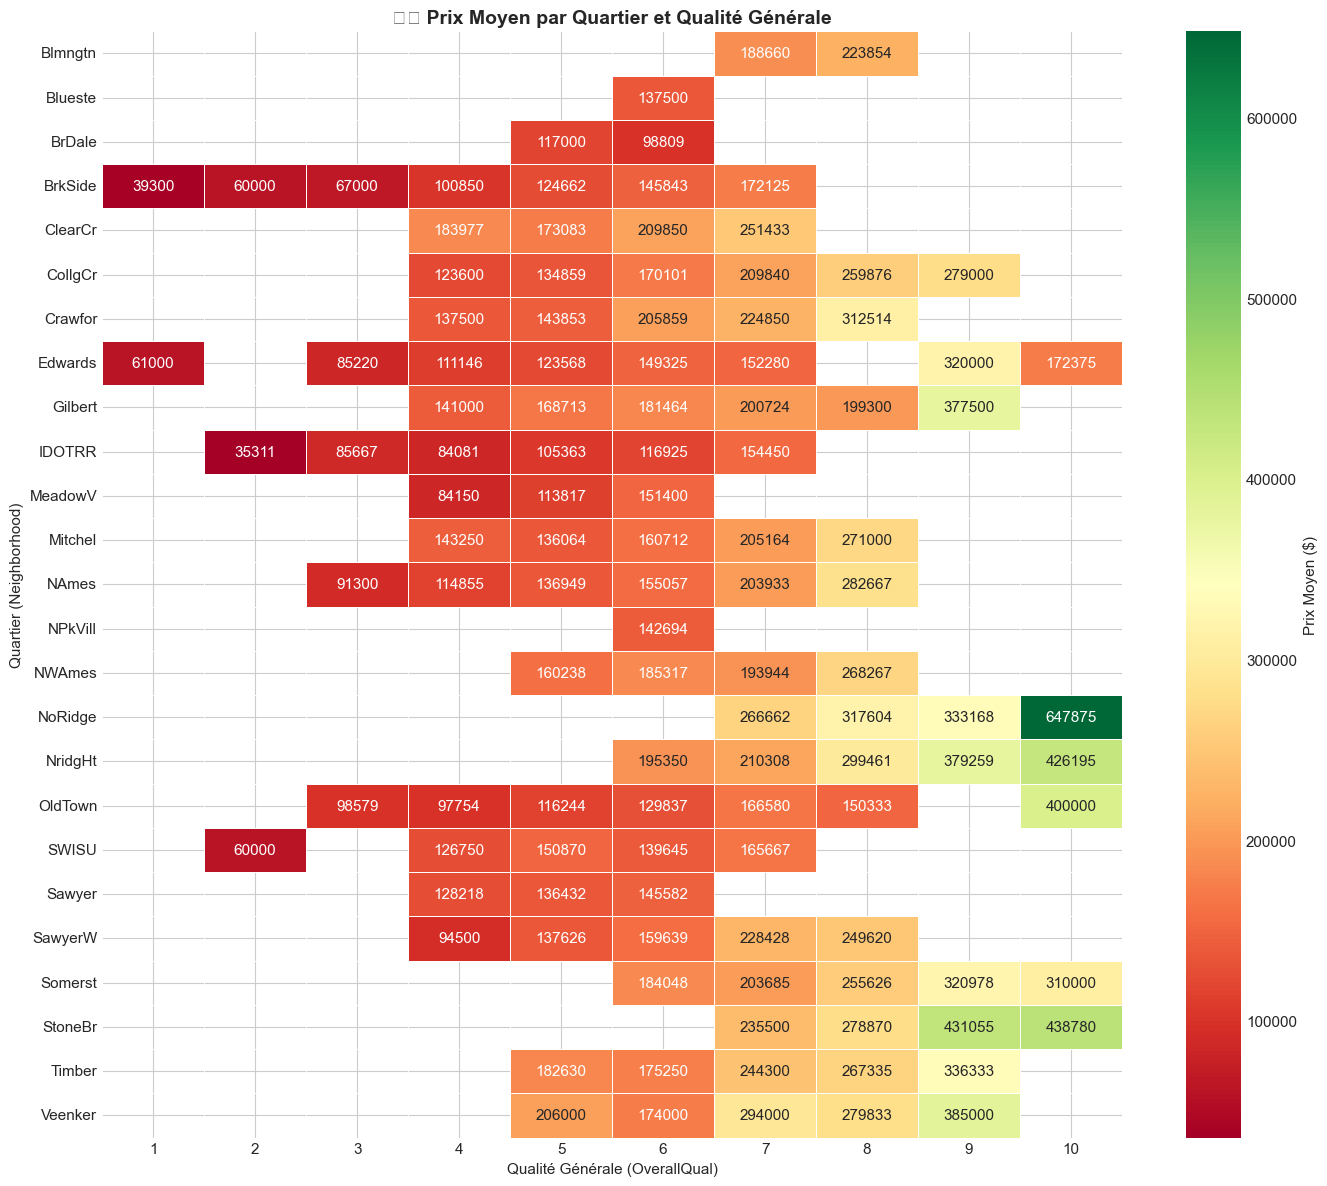

In [16]:
# =============================================================================
# HEATMAP: PRIX MOYENS PAR NEIGHBORHOOD & OVERALLQUAL
# =============================================================================

# Pivot table
pivot = df_original.pivot_table(values='SalePrice', index='Neighborhood', 
                                 columns='OverallQual', aggfunc='mean')

fig, ax = plt.subplots(figsize=(14, 12))
sns.heatmap(pivot, cmap='RdYlGn', annot=True, fmt='.0f', 
            linewidths=0.5, ax=ax, cbar_kws={'label': 'Prix Moyen ($)'})
ax.set_title('🗺️ Prix Moyen par Quartier et Qualité Générale', fontsize=14, fontweight='bold')
ax.set_xlabel('Qualité Générale (OverallQual)')
ax.set_ylabel('Quartier (Neighborhood)')

plt.tight_layout()
plt.show()

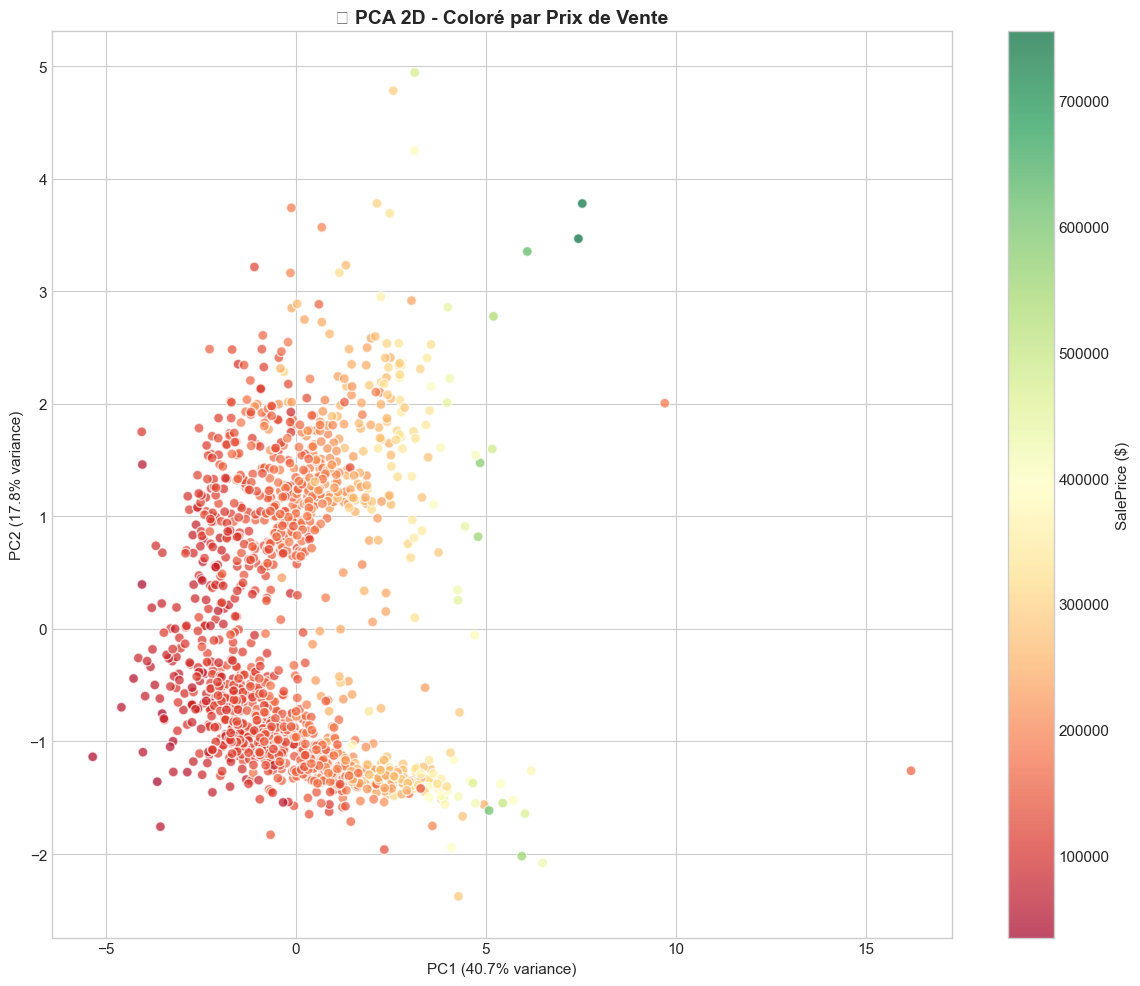


📊 Variance expliquée: PC1=40.7%, PC2=17.8%
📊 Total: 58.5%


In [17]:
# =============================================================================
# PCA 2D - VISUALISATION DES CLUSTERS
# =============================================================================

# Préparation des données pour PCA
pca_features = ['GrLivArea', 'TotalBsmtSF', 'GarageArea', '1stFlrSF', '2ndFlrSF',
                'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt']

pca_data = df_original[pca_features + ['SalePrice']].dropna()
X_pca = pca_data[pca_features]
y_pca = pca_data['SalePrice']

# Standardisation
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_pca)

# PCA
pca = PCA(n_components=2)
X_pca_2d = pca.fit_transform(X_scaled)

# Visualisation
fig, ax = plt.subplots(figsize=(12, 10))
scatter = ax.scatter(X_pca_2d[:, 0], X_pca_2d[:, 1], c=y_pca, 
                     cmap='RdYlGn', alpha=0.7, s=50, edgecolor='white')
plt.colorbar(scatter, label='SalePrice ($)')
ax.set_xlabel(f'PC1 ({pca.explained_variance_ratio_[0]*100:.1f}% variance)')
ax.set_ylabel(f'PC2 ({pca.explained_variance_ratio_[1]*100:.1f}% variance)')
ax.set_title('🎯 PCA 2D - Coloré par Prix de Vente', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

print(f"\n📊 Variance expliquée: PC1={pca.explained_variance_ratio_[0]*100:.1f}%, PC2={pca.explained_variance_ratio_[1]*100:.1f}%")
print(f"📊 Total: {sum(pca.explained_variance_ratio_)*100:.1f}%")

---
## 7. Feature Importance Préliminaire

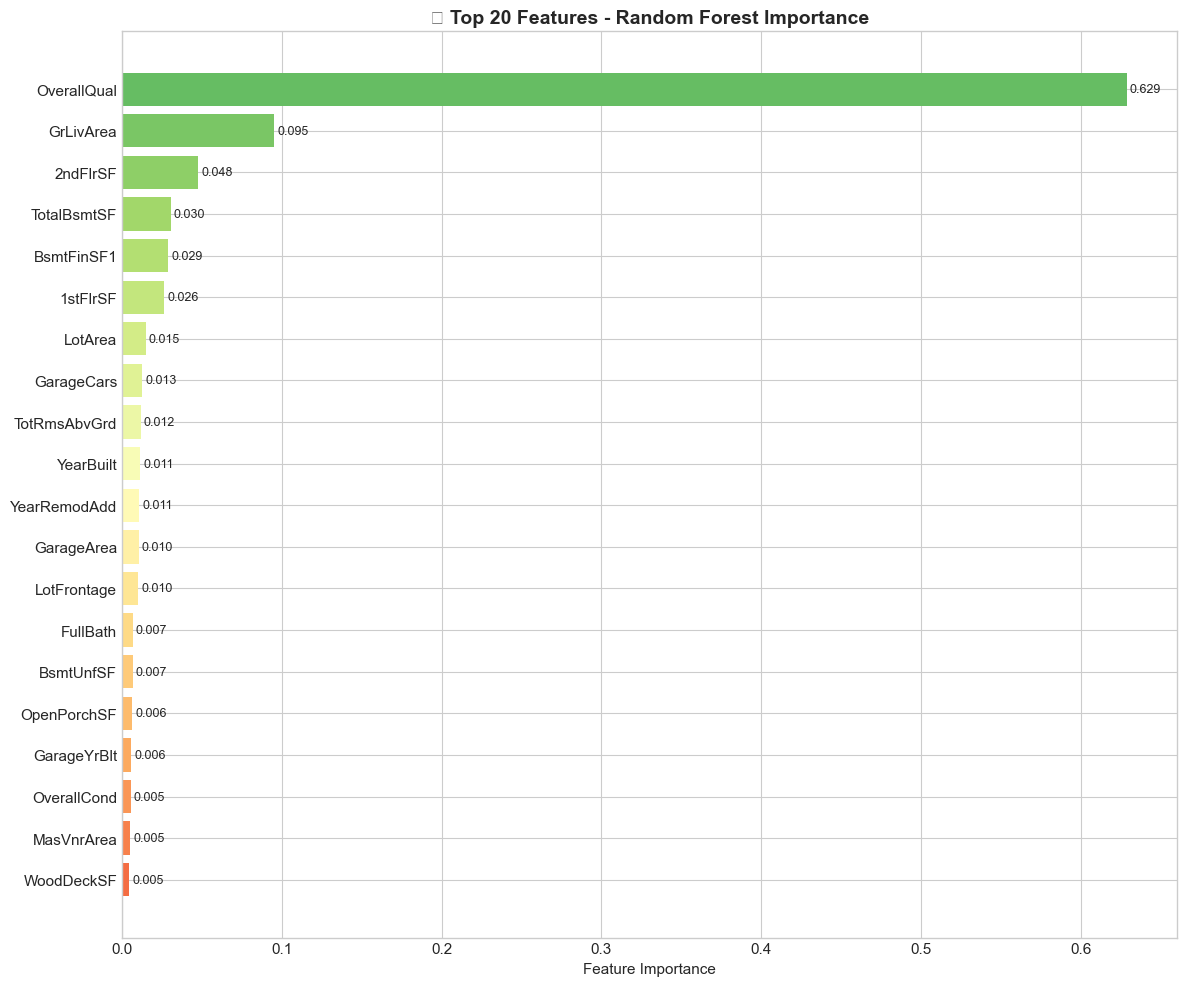


📊 Top 10 Features:
     Feature  Importance
 OverallQual        0.63
   GrLivArea        0.10
    2ndFlrSF        0.05
 TotalBsmtSF        0.03
  BsmtFinSF1        0.03
    1stFlrSF        0.03
     LotArea        0.01
  GarageCars        0.01
TotRmsAbvGrd        0.01
   YearBuilt        0.01


In [18]:
# =============================================================================
# RANDOM FOREST FEATURE IMPORTANCE
# =============================================================================

# Préparer les données
rf_features = df_original.select_dtypes(include=[np.number]).columns.tolist()
rf_features = [f for f in rf_features if f not in ['Id', 'SalePrice']]

rf_data = df_original[rf_features + ['SalePrice']].dropna()
X_rf = rf_data[rf_features]
y_rf = rf_data['SalePrice']

# Entraîner un Random Forest rapide
rf = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42, n_jobs=-1)
rf.fit(X_rf, y_rf)

# Feature importance
feature_importance = pd.DataFrame({
    'Feature': rf_features,
    'Importance': rf.feature_importances_
}).sort_values('Importance', ascending=False)

# Visualisation
fig, ax = plt.subplots(figsize=(12, 10))
top_20 = feature_importance.head(20)
colors = plt.cm.RdYlGn(np.linspace(0.2, 0.8, 20))[::-1]
ax.barh(top_20['Feature'], top_20['Importance'], color=colors)
ax.set_xlabel('Feature Importance')
ax.set_title('🏆 Top 20 Features - Random Forest Importance', fontsize=14, fontweight='bold')
ax.invert_yaxis()

# Annotations
for i, (idx, row) in enumerate(top_20.iterrows()):
    ax.text(row['Importance'] + 0.002, i, f"{row['Importance']:.3f}", va='center', fontsize=9)

plt.tight_layout()
plt.show()

print("\n📊 Top 10 Features:")
print(feature_importance.head(10).to_string(index=False))

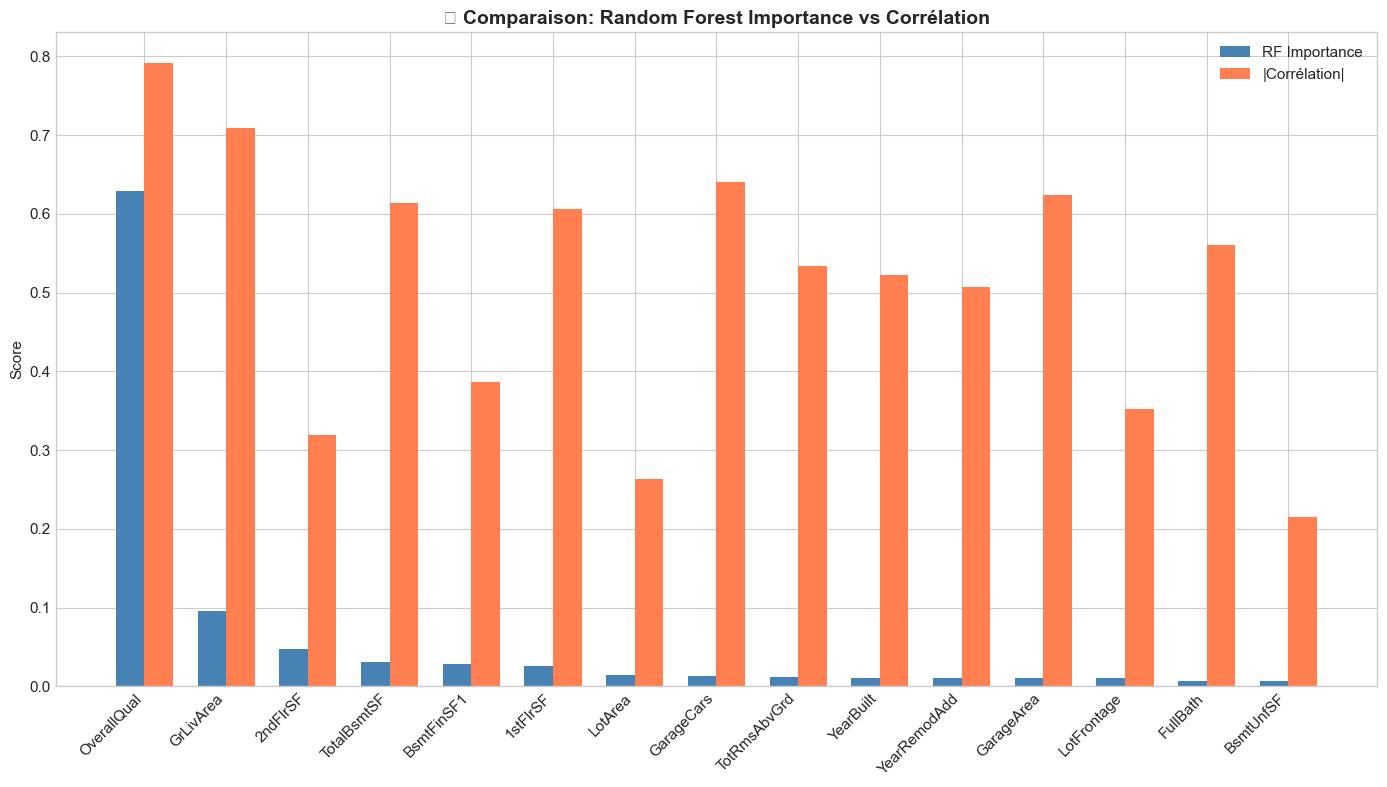

In [19]:
# =============================================================================
# COMPARAISON: CORRÉLATION VS IMPORTANCE RF
# =============================================================================

# Préparer la comparaison
comparison = feature_importance.head(15).copy()
comparison['Correlation'] = comparison['Feature'].apply(
    lambda x: abs(df_original[x].corr(df_original['SalePrice'])) if x in df_original.columns else 0
)

# Visualisation
fig, ax = plt.subplots(figsize=(14, 8))
x = np.arange(len(comparison))
width = 0.35

bars1 = ax.bar(x - width/2, comparison['Importance'], width, label='RF Importance', color='steelblue')
bars2 = ax.bar(x + width/2, comparison['Correlation'], width, label='|Corrélation|', color='coral')

ax.set_ylabel('Score')
ax.set_title('📊 Comparaison: Random Forest Importance vs Corrélation', fontsize=14, fontweight='bold')
ax.set_xticks(x)
ax.set_xticklabels(comparison['Feature'], rotation=45, ha='right')
ax.legend()

plt.tight_layout()
plt.show()

---
## 8. Analyse Temporelle

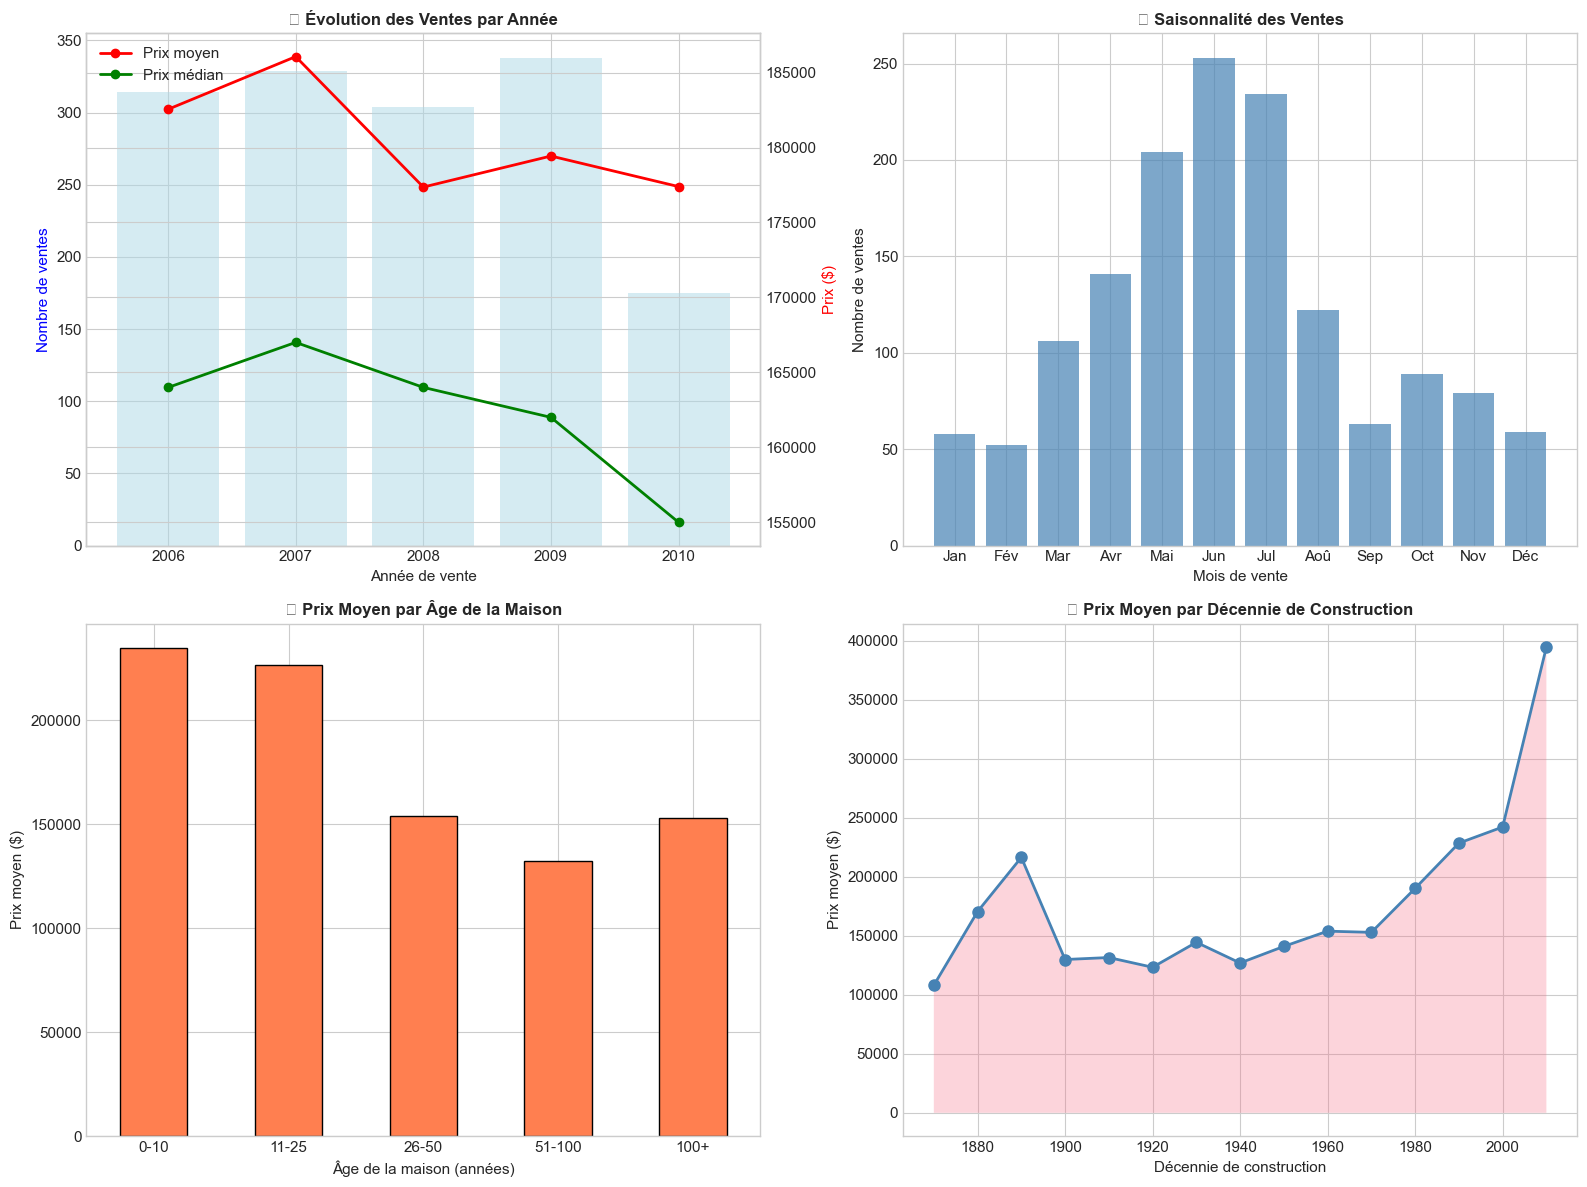

In [20]:
# =============================================================================
# ANALYSE TEMPORELLE
# =============================================================================

fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# 1. Prix par année de vente
ax1 = axes[0, 0]
yearly = df_original.groupby('YrSold')['SalePrice'].agg(['mean', 'median', 'count'])
ax1.bar(yearly.index, yearly['count'], alpha=0.5, color='lightblue', label='Nombre de ventes')
ax1_twin = ax1.twinx()
ax1_twin.plot(yearly.index, yearly['mean'], 'ro-', linewidth=2, label='Prix moyen')
ax1_twin.plot(yearly.index, yearly['median'], 'go-', linewidth=2, label='Prix médian')
ax1.set_xlabel('Année de vente')
ax1.set_ylabel('Nombre de ventes', color='blue')
ax1_twin.set_ylabel('Prix ($)', color='red')
ax1.set_title('📅 Évolution des Ventes par Année', fontsize=12, fontweight='bold')
ax1_twin.legend(loc='upper left')

# 2. Prix par mois de vente
ax2 = axes[0, 1]
monthly = df_original.groupby('MoSold')['SalePrice'].agg(['mean', 'count'])
ax2.bar(monthly.index, monthly['count'], alpha=0.7, color='steelblue')
ax2.set_xlabel('Mois de vente')
ax2.set_ylabel('Nombre de ventes')
ax2.set_title('📅 Saisonnalité des Ventes', fontsize=12, fontweight='bold')
ax2.set_xticks(range(1, 13))
ax2.set_xticklabels(['Jan', 'Fév', 'Mar', 'Avr', 'Mai', 'Jun', 'Jul', 'Aoû', 'Sep', 'Oct', 'Nov', 'Déc'])

# 3. Prix vs âge de la maison
ax3 = axes[1, 0]
df_original['HouseAge'] = df_original['YrSold'] - df_original['YearBuilt']
age_bins = pd.cut(df_original['HouseAge'], bins=[0, 10, 25, 50, 100, 200], labels=['0-10', '11-25', '26-50', '51-100', '100+'])
age_price = df_original.groupby(age_bins)['SalePrice'].mean()
age_price.plot(kind='bar', ax=ax3, color='coral', edgecolor='black')
ax3.set_xlabel('Âge de la maison (années)')
ax3.set_ylabel('Prix moyen ($)')
ax3.set_title('🏠 Prix Moyen par Âge de la Maison', fontsize=12, fontweight='bold')
ax3.tick_params(axis='x', rotation=0)

# 4. Prix par année de construction
ax4 = axes[1, 1]
decade = (df_original['YearBuilt'] // 10) * 10
decade_price = df_original.groupby(decade)['SalePrice'].mean()
ax4.plot(decade_price.index, decade_price.values, 'o-', color='steelblue', linewidth=2, markersize=8)
ax4.fill_between(decade_price.index, decade_price.values, alpha=0.3)
ax4.set_xlabel('Décennie de construction')
ax4.set_ylabel('Prix moyen ($)')
ax4.set_title('📅 Prix Moyen par Décennie de Construction', fontsize=12, fontweight='bold')

plt.tight_layout()
plt.show()

---
## 9. Conclusions et Insights

In [21]:
# =============================================================================
# RÉSUMÉ DES INSIGHTS
# =============================================================================

print("="*70)
print("📊 RÉSUMÉ DE L'ANALYSE EXPLORATOIRE")
print("="*70)

insights = """
┌─────────────────────────────────────────────────────────────────────┐
│  🎯 INSIGHTS CLÉS                                                   │
├─────────────────────────────────────────────────────────────────────┤
│                                                                     │
│  1. VARIABLE CIBLE (SalePrice):                                     │
│     • Distribution asymétrique à droite (skew = 1.88)               │
│     • Log-transformation améliore significativement la normalité    │
│     • Prix médian: $163,000, Prix moyen: $180,921                   │
│                                                                     │
│  2. TOP FEATURES CORRÉLÉES:                                         │
│     • OverallQual (r=0.79) - Qualité générale                       │
│     • GrLivArea (r=0.71) - Surface habitable                        │
│     • GarageCars (r=0.64) - Capacité du garage                      │
│     • GarageArea (r=0.62) - Surface du garage                       │
│     • TotalBsmtSF (r=0.61) - Surface du sous-sol                    │
│                                                                     │
│  3. PATTERNS GÉOGRAPHIQUES:                                         │
│     • NridgHt, NoRidge, StoneBr = Quartiers les plus chers          │
│     • MeadowV, BrDale, IDOTRR = Quartiers les moins chers           │
│     • Forte variance des prix selon le quartier                     │
│                                                                     │
│  4. PATTERNS TEMPORELS:                                             │
│     • Pics de ventes en Mai-Juin-Juillet                            │
│     • Maisons récentes (0-10 ans) = prix plus élevés                │
│     • Maisons construites après 2000 = premium significatif         │
│                                                                     │
│  5. OUTLIERS IDENTIFIÉS:                                            │
│     • GrLivArea > 4000 sqft avec prix < $300,000 (anomalies)        │
│     • LotArea a quelques valeurs extrêmes                           │
│                                                                     │
│  6. RECOMMANDATIONS POUR LA MODÉLISATION:                           │
│     • Utiliser Log-transformation pour SalePrice                    │
│     • Inclure les features d'interaction (QualityArea)              │
│     • Neighborhood est crucial (utiliser Target Encoding)           │
│     • Supprimer les outliers extrêmes identifiés                    │
│                                                                     │
└─────────────────────────────────────────────────────────────────────┘
"""

print(insights)
print("\n🎉 Analyse exploratoire terminée! Passez au notebook 03_modeling.ipynb pour la modélisation.")

📊 RÉSUMÉ DE L'ANALYSE EXPLORATOIRE

┌─────────────────────────────────────────────────────────────────────┐
│  🎯 INSIGHTS CLÉS                                                   │
├─────────────────────────────────────────────────────────────────────┤
│                                                                     │
│  1. VARIABLE CIBLE (SalePrice):                                     │
│     • Distribution asymétrique à droite (skew = 1.88)               │
│     • Log-transformation améliore significativement la normalité    │
│     • Prix médian: $163,000, Prix moyen: $180,921                   │
│                                                                     │
│  2. TOP FEATURES CORRÉLÉES:                                         │
│     • OverallQual (r=0.79) - Qualité générale                       │
│     • GrLivArea (r=0.71) - Surface habitable                        │
│     • GarageCars (r=0.64) - Capacité du garage                      │
│     • GarageArea (r=0.62) -